In [1]:
library(CellChat)
library(patchwork)
options(stringsAsFactors = FALSE)
library(dplyr)
library(ggplot2)
library(svglite)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



# Loading data

In [2]:
cellchat_ss <- readRDS('/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/data/cellchat_results/cellchat_major_ss.rds')
cellchat_hc <- readRDS('/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/data/cellchat_results/cellchat_major_hc.rds')

In [98]:
object.list <- list(ss = cellchat_ss, hc = cellchat_hc)
#object.list <- list(hc = cellchat_hc,ss = cellchat_ss)
cellchat <- mergeCellChat(object.list, add.names = names(object.list),cell.prefix = TRUE)

The cell barcodes in merged 'meta' is  TCCAGAAGTAGTACGG-1_1 GTTGTCCGTATTTCCT-1_1 AAGATAGCAGCGTTGC-1_1 GTTTGGAGTCTACAAC-1_1 GTAATCGGTCACAATC-1_1 AGAGAATTCAACACGT-1_1 


Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [80]:
head(cellchat@meta)
#head(cellchat@DB)
#head(cellchat@LR)
unique(cellchat@meta$celltype_major)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,ident,scDblFinder.sample,scDblFinder.class,scDblFinder.score,scDblFinder.weighted,scDblFinder.cxds_score,sample,seurat_clusters,celltype_submarkers,celltype_major,celltype_minor,cli_state,tissue,datasets
,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
TCCAGAAGTAGTACGG-1_1_ss,XNCX_1,436077,10126,4.088727,AnnData,XNCX_1,singlet,0.025334520,0.3146560,1.0000000,XNCX_1,7,Serous_acini_MUC7_CRISP3_PIGR,Serous_acini,Serous_acini_MUC7,SjS,SG,ss
GTTGTCCGTATTTCCT-1_1_ss,XNCX_1,352962,7663,4.699089,AnnData,XNCX_1,singlet,0.004421095,0.1709749,0.5344377,XNCX_1,10,Serous_acini_CLDN10_PRDX4_SEC11C,Serous_acini,Serous_acini_CLDN10,SjS,SG,ss
AAGATAGCAGCGTTGC-1_1_ss,XNCX_1,311412,7930,4.528085,AnnData,XNCX_1,singlet,0.001616381,0.1726661,0.9999142,XNCX_1,10,Serous_acini_CLDN10_PRDX4_SEC11C,Serous_acini,Serous_acini_CLDN10,SjS,SG,ss
GTTTGGAGTCTACAAC-1_1_ss,XNCX_1,296501,7854,2.682622,AnnData,XNCX_1,singlet,0.005488624,0.1770360,0.5357480,XNCX_1,10,Serous_acini_CLDN10_PRDX4_SEC11C,Serous_acini,Serous_acini_CLDN10,SjS,SG,ss
GTAATCGGTCACAATC-1_1_ss,XNCX_1,296398,7766,5.652872,AnnData,XNCX_1,singlet,0.002437610,0.1078133,0.5362830,XNCX_1,10,Serous_acini_CLDN10_PRDX4_SEC11C,Serous_acini,Serous_acini_CLDN10,SjS,SG,ss
AGAGAATTCAACACGT-1_1_ss,XNCX_1,291941,8102,3.146526,AnnData,XNCX_1,singlet,0.003613990,0.1221930,1.0000000,XNCX_1,10,Serous_acini_CLDN10_PRDX4_SEC11C,Serous_acini,Serous_acini_CLDN10,SjS,SG,ss


[1] Serous_acini  Mucous_acini  Ductal        Endothelial   Ionocytes    
 [6] Myofibroblast Pericytes     Myoepithelial Fibroblast    Melanocytes  
[11] Plasma        CD4_T         Cycling_T     Mast          Mac/mo       
[16] cDC           CD8_T         B             gdT           MAIT         
[21] NK           
21 Levels: B CD4_T CD8_T Cycling_T Ductal Endothelial Fibroblast ... gdT

# show overall interaction number or strength

Saving 6.67 x 6.67 in image



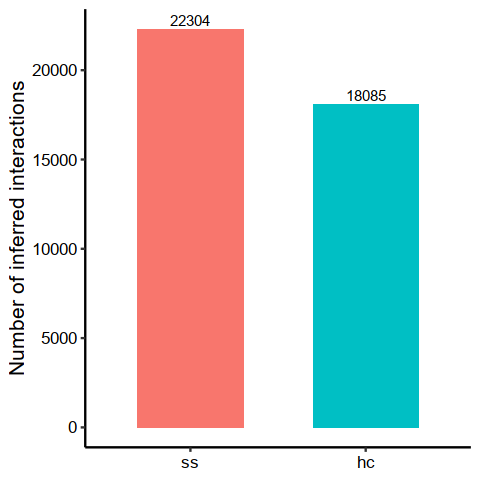

In [48]:
### show number of interactions
options(repr.plot.width=4, repr.plot.height=4)
gg1 <- compareInteractions(cellchat, show.legend = F, group = c(1,2), size.text=12)
# gg2 <- compareInteractions(cellchat, show.legend = F, group = c(1,2), measure = "weight")
# gg1 + gg2
gg1
ggsave("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Num_interactions_ss_hc.pdf")

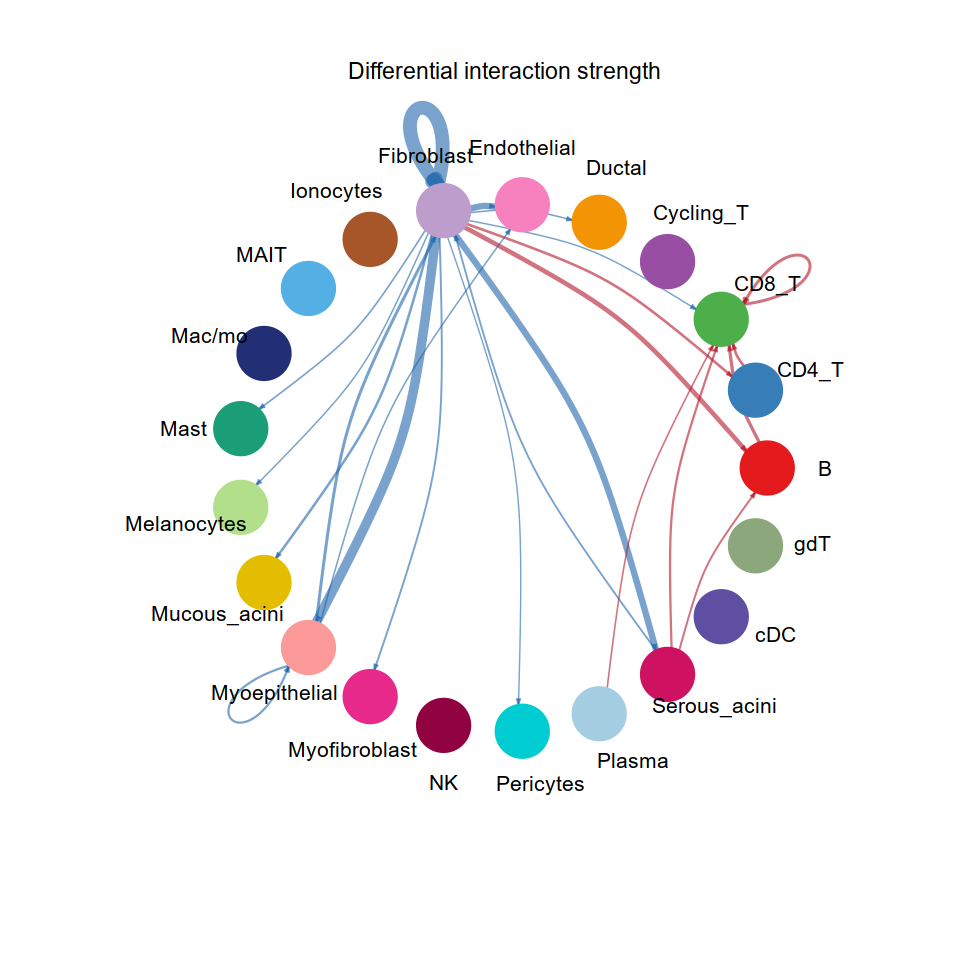

In [449]:
#netVisual_diffInteraction(cellchat, weight.scale = T)
#pdf("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Celltypes_interactions_ss_hc_circos.pdf",width = 6, height = 6)
options(repr.plot.width=8, repr.plot.height=8)
gg=netVisual_diffInteraction(cellchat, comparison = c(2, 1), weight.scale = T, measure = "weight",top=0.05)
#dev.off()

In [53]:
pdf("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Celltype_interactions_ss_hc.pdf",width = 16, height = 8)
options(repr.plot.width=16, repr.plot.height=8)
gg1 <- netVisual_heatmap(cellchat,font.size = 12,font.size.title = 15,comparison = c(2, 1))
#> Do heatmap based on a merged object
gg2 <- netVisual_heatmap(cellchat,font.size = 12, font.size.title = 15,measure = "weight",comparison = c(2, 1))
#> Do heatmap based on a merged object
gg1 + gg2
dev.off()

Do heatmap based on a merged object 


Do heatmap based on a merged object 


Warning message:
“Heatmap/annotation names are duplicated: Relative values”


png 
  2

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


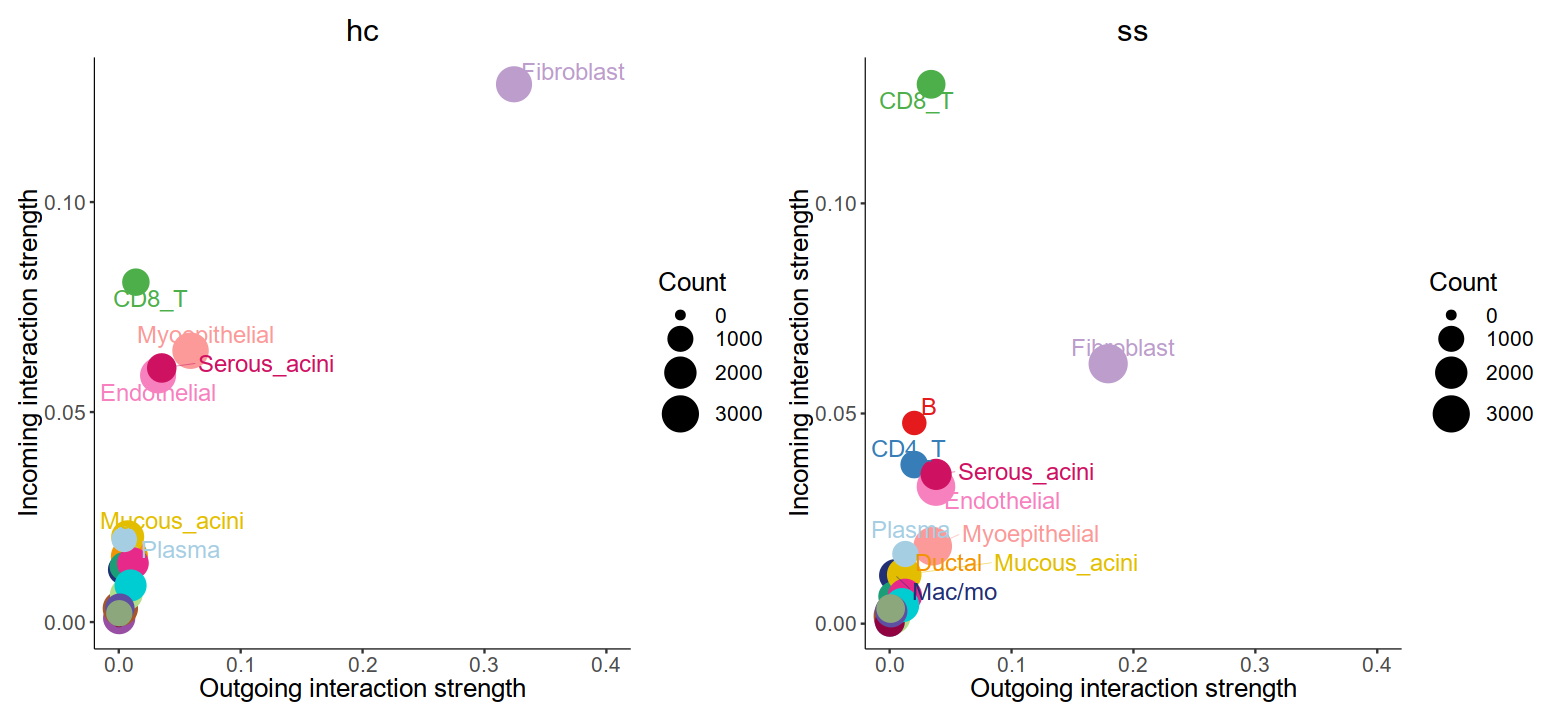

In [82]:
# Defining object.list
object.list <- list(hc = cellchat_hc,ss = cellchat_ss)
#
#pdf("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Celltype_Dotplot_ss_hc.pdf",width = 16, height = 8)
options(repr.plot.width=13, repr.plot.height=6)
num.link <- sapply(object.list, function(x) {rowSums(x@net$count) + colSums(x@net$count)-diag(x@net$count)})
weight.MinMax <- c(min(num.link), max(num.link)) # control the dot size in the different datasets
gg <- list()
for (i in 1:length(object.list)) {
  gg[[i]] <- netAnalysis_signalingRole_scatter(object.list[[i]], title = names(object.list)[i], weight.MinMax = weight.MinMax,
                                              font.size = 15,font.size.title = 18,dot.size = c(2,10),label.size = 5)+xlim(0,0.4)
}
#> Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
#> Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
patchwork::wrap_plots(plots = gg)
#dev.off()

In [122]:
netVisual_heatmap <- function (object, comparison = c(1, 2), measure = c("count", 
    "weight"), signaling = NULL, slot.name = c("netP", "net"), 
    color.use = NULL, color.heatmap = c("#2166ac", "#b2182b"), 
    title.name = NULL, width = NULL, height = NULL, font.size = 8, 
    font.size.title = 10, cluster.rows = FALSE, cluster.cols = FALSE, 
    sources.use = NULL, targets.use = NULL, remove.isolate = FALSE, 
    row.show = NULL, col.show = NULL) 
{
    if (!is.null(measure)) {
        measure <- match.arg(measure)
    }
    slot.name <- match.arg(slot.name)
    if (is.list(object@net[[1]])) {
        message("Do heatmap based on a merged object \n")
        obj1 <- object@net[[comparison[1]]][[measure]]
        obj2 <- object@net[[comparison[2]]][[measure]]
        net.diff <- obj2 - obj1
        if (measure == "count") {
            if (is.null(title.name)) {
                title.name = "Differential number of interactions"
            }
        }
        else if (measure == "weight") {
            if (is.null(title.name)) {
                title.name = "Differential interaction strength"
            }
        }
        legend.name = "Relative values"
    }
    else {
        message("Do heatmap based on a single object \n")
        if (!is.null(signaling)) {
            net.diff <- slot(object, slot.name)$prob[, , signaling]
            if (is.null(title.name)) {
                title.name = paste0(signaling, " signaling network")
            }
            legend.name <- "Communication Prob."
        }
        else if (!is.null(measure)) {
            net.diff <- object@net[[measure]]
            if (measure == "count") {
                if (is.null(title.name)) {
                  title.name = "Number of interactions"
                }
            }
            else if (measure == "weight") {
                if (is.null(title.name)) {
                  title.name = "Interaction strength"
                }
            }
            legend.name <- title.name
        }
    }
    net <- net.diff
    if ((!is.null(sources.use)) | (!is.null(targets.use))) {
        df.net <- reshape2::melt(net, value.name = "value")
        colnames(df.net)[1:2] <- c("source", "target")
        if (!is.null(sources.use)) {
            if (is.numeric(sources.use)) {
                sources.use <- rownames(net.diff)[sources.use]
            }
            df.net <- subset(df.net, source %in% sources.use)
        }
        if (!is.null(targets.use)) {
            if (is.numeric(targets.use)) {
                targets.use <- rownames(net.diff)[targets.use]
            }
            df.net <- subset(df.net, target %in% targets.use)
        }
        cells.level <- rownames(net.diff)
        df.net$source <- factor(df.net$source, levels = cells.level)
        df.net$target <- factor(df.net$target, levels = cells.level)
        df.net$value[is.na(df.net$value)] <- 0
        net <- tapply(df.net[["value"]], list(df.net[["source"]], 
            df.net[["target"]]), sum)
    }
    net[is.na(net)] <- 0
    if (remove.isolate) {
        idx1 <- which(Matrix::rowSums(net) == 0)
        idx2 <- which(Matrix::colSums(net) == 0)
        idx <- intersect(idx1, idx2)
        net <- net[-idx, ]
        net <- net[, -idx]
        if (length(idx) > 0) {
            net <- net[-idx, ]
            net <- net[, -idx]
        }
    }
    mat <- net
    if (is.null(color.use)) {
        color.use <- scPalette(ncol(mat))
    }
    names(color.use) <- colnames(mat)
    if (!is.null(row.show)) {
        mat <- mat[row.show, ]
    }
    if (!is.null(col.show)) {
        mat <- mat[, col.show]
        color.use <- color.use[col.show]
    }
    if (min(mat) < 0) {
        color.heatmap.use = colorRamp3(c(min(mat), 0, max(mat)), 
            c(color.heatmap[1], "#f7f7f7", color.heatmap[2]))
        colorbar.break <- c(round(min(mat, na.rm = T), digits = nchar(sub(".*\\.(0*).*", 
            "\\1", min(mat, na.rm = T))) + 1), 0, round(max(mat, 
            na.rm = T), digits = nchar(sub(".*\\.(0*).*", "\\1", 
            max(mat, na.rm = T))) + 1))
    }
    else {
        if (length(color.heatmap) == 3) {
            color.heatmap.use = colorRamp3(c(0, min(mat), max(mat)), 
                color.heatmap)
        }
        else if (length(color.heatmap) == 2) {
            color.heatmap.use = colorRamp3(c(min(mat), max(mat)), 
                color.heatmap)
        }
        else if (length(color.heatmap) == 1) {
            color.heatmap.use = (grDevices::colorRampPalette((RColorBrewer::brewer.pal(n = 9, 
                name = color.heatmap))))(100)
        }
        colorbar.break <- c(round(min(mat, na.rm = T), digits = nchar(sub(".*\\.(0*).*", 
            "\\1", min(mat, na.rm = T))) + 1), round(max(mat, 
            na.rm = T), digits = nchar(sub(".*\\.(0*).*", "\\1", 
            max(mat, na.rm = T))) + 1))
    }
    df <- data.frame(group = colnames(mat))
    rownames(df) <- colnames(mat)
    return (mat)
    col_annotation <- HeatmapAnnotation(df = df, col = list(group = color.use), 
        which = "column", show_legend = FALSE, show_annotation_name = FALSE, 
        simple_anno_size = grid::unit(0.2, "cm"))
    row_annotation <- HeatmapAnnotation(df = df, col = list(group = color.use), 
        which = "row", show_legend = FALSE, show_annotation_name = FALSE, 
        simple_anno_size = grid::unit(0.2, "cm"))
    ha1 = rowAnnotation(Strength = anno_barplot(rowSums(abs(mat)), 
        border = FALSE, gp = gpar(fill = color.use, col = color.use)), 
        show_annotation_name = FALSE)
    ha2 = HeatmapAnnotation(Strength = anno_barplot(colSums(abs(mat)), 
        border = FALSE, gp = gpar(fill = color.use, col = color.use)), 
        show_annotation_name = FALSE)
    if (sum(abs(mat) > 0) == 1) {
        color.heatmap.use = c("white", color.heatmap.use)
    }
    else {
        mat[mat == 0] <- NA
    }
    ht1 = Heatmap(mat, col = color.heatmap.use, na_col = "white", 
        name = legend.name, bottom_annotation = col_annotation, 
        left_annotation = row_annotation, top_annotation = ha2, 
        right_annotation = ha1, cluster_rows = cluster.rows, 
        cluster_columns = cluster.rows, row_names_side = "left", 
        row_names_rot = 0, row_names_gp = gpar(fontsize = font.size), 
        column_names_gp = gpar(fontsize = font.size), column_title = title.name, 
        column_title_gp = gpar(fontsize = font.size.title), column_names_rot = 90, 
        row_title = "Sources (Sender)", row_title_gp = gpar(fontsize = font.size.title), 
        row_title_rot = 90, heatmap_legend_param = list(title_gp = gpar(fontsize = 8, 
            fontface = "plain"), title_position = "leftcenter-rot", 
            border = NA, legend_height = unit(20, "mm"), labels_gp = gpar(fontsize = 8), 
            grid_width = unit(2, "mm")))
    #return(ht1)
}

In [114]:
diffInteraction <- function (object, comparison = c(1, 2), measure = c("count", 
    "weight", "count.merged", "weight.merged"), color.use = NULL, 
    color.edge = c("#b2182b", "#2166ac"), title.name = NULL, 
    sources.use = NULL, targets.use = NULL, remove.isolate = FALSE, 
    top = 1, weight.scale = FALSE, vertex.weight = 20, vertex.weight.max = NULL, 
    vertex.size.max = 15, vertex.label.cex = 1, vertex.label.color = "black", 
    edge.weight.max = NULL, edge.width.max = 8, alpha.edge = 0.6, 
    label.edge = FALSE, edge.label.color = "black", edge.label.cex = 0.8, 
    edge.curved = 0.2, shape = "circle", layout = in_circle(), 
    margin = 0.2, arrow.width = 1, arrow.size = 0.2) 
{
    options(warn = -1)
    measure <- match.arg(measure)
    obj1 <- object@net[[comparison[1]]][[measure]]
    obj2 <- object@net[[comparison[2]]][[measure]]
    net.diff <- obj2 - obj1
    if (measure %in% c("count", "count.merged")) {
        if (is.null(title.name)) {
            title.name = "Differential number of interactions"
        }
    }
    else if (measure %in% c("weight", "weight.merged")) {
        if (is.null(title.name)) {
            title.name = "Differential interaction strength"
        }
    }
    net <- net.diff
    if ((!is.null(sources.use)) | (!is.null(targets.use))) {
        df.net <- reshape2::melt(net, value.name = "value")
        colnames(df.net)[1:2] <- c("source", "target")
        if (!is.null(sources.use)) {
            if (is.numeric(sources.use)) {
                sources.use <- rownames(net.diff)[sources.use]
            }
            df.net <- subset(df.net, source %in% sources.use)
        }
        if (!is.null(targets.use)) {
            if (is.numeric(targets.use)) {
                targets.use <- rownames(net.diff)[targets.use]
            }
            df.net <- subset(df.net, target %in% targets.use)
        }
        cells.level <- rownames(net.diff)
        df.net$source <- factor(df.net$source, levels = cells.level)
        df.net$target <- factor(df.net$target, levels = cells.level)
        df.net$value[is.na(df.net$value)] <- 0
        net <- tapply(df.net[["value"]], list(df.net[["source"]], 
            df.net[["target"]]), sum)
    }
    if (remove.isolate) {
        idx1 <- which(Matrix::rowSums(net) == 0)
        idx2 <- which(Matrix::colSums(net) == 0)
        idx <- intersect(idx1, idx2)
        net <- net[-idx, ]
        net <- net[, -idx]
    }
    net[abs(net) < stats::quantile(abs(net), probs = 1 - top)] <- 0
    return (net)
    g <- graph_from_adjacency_matrix(net, mode = "directed", 
        weighted = T)
    edge.start <- igraph::ends(g, es = igraph::E(g), names = FALSE)
    coords <- layout_(g, layout)
    if (nrow(coords) != 1) {
        coords_scale = scale(coords)
    }
    else {
        coords_scale <- coords
    }
    if (is.null(color.use)) {
        color.use = scPalette(length(igraph::V(g)))
    }
    if (is.null(vertex.weight.max)) {
        vertex.weight.max <- max(vertex.weight)
    }
    vertex.weight <- vertex.weight/vertex.weight.max * vertex.size.max + 
        5
    loop.angle <- ifelse(coords_scale[igraph::V(g), 1] > 0, -atan(coords_scale[igraph::V(g), 
        2]/coords_scale[igraph::V(g), 1]), pi - atan(coords_scale[igraph::V(g), 
        2]/coords_scale[igraph::V(g), 1]))
    igraph::V(g)$size <- vertex.weight
    igraph::V(g)$color <- color.use[igraph::V(g)]
    igraph::V(g)$frame.color <- color.use[igraph::V(g)]
    igraph::V(g)$label.color <- vertex.label.color
    igraph::V(g)$label.cex <- vertex.label.cex
    if (label.edge) {
        igraph::E(g)$label <- igraph::E(g)$weight
        igraph::E(g)$label <- round(igraph::E(g)$label, digits = 1)
    }
    igraph::E(g)$arrow.width <- arrow.width
    igraph::E(g)$arrow.size <- arrow.size
    igraph::E(g)$label.color <- edge.label.color
    igraph::E(g)$label.cex <- edge.label.cex
    igraph::E(g)$color <- ifelse(igraph::E(g)$weight > 0, color.edge[1], 
        color.edge[2])
    igraph::E(g)$color <- grDevices::adjustcolor(igraph::E(g)$color, 
        alpha.edge)
    igraph::E(g)$weight <- abs(igraph::E(g)$weight)
    if (is.null(edge.weight.max)) {
        edge.weight.max <- max(igraph::E(g)$weight)
    }
    if (weight.scale == TRUE) {
        igraph::E(g)$width <- 0.3 + igraph::E(g)$weight/edge.weight.max * 
            edge.width.max
    }
    else {
        igraph::E(g)$width <- 0.3 + edge.width.max * igraph::E(g)$weight
    }
    if (sum(edge.start[, 2] == edge.start[, 1]) != 0) {
        igraph::E(g)$loop.angle[which(edge.start[, 2] == edge.start[, 
            1])] <- loop.angle[edge.start[which(edge.start[, 
            2] == edge.start[, 1]), 1]]
    }
    radian.rescale <- function(x, start = 0, direction = 1) {
        c.rotate <- function(x) (x + start)%%(2 * pi) * direction
        c.rotate(scales::rescale(x, c(0, 2 * pi), range(x)))
    }
    label.locs <- radian.rescale(x = 1:length(igraph::V(g)), 
        direction = -1, start = 0)
    label.dist <- vertex.weight/max(vertex.weight) + 2
    plot(g, edge.curved = edge.curved, vertex.shape = shape, 
        layout = coords_scale, margin = margin, vertex.label.dist = label.dist, 
        vertex.label.degree = label.locs, vertex.label.family = "Helvetica", 
        edge.label.family = "Helvetica")
    if (!is.null(title.name)) {
        text(0, 1.5, title.name, cex = 1.1)
    }
    gg <- recordPlot()
    #return(gg)
}

In [181]:
netAnalysis_signalingRole_scatter <- function (object, signaling = NULL, color.use = NULL, slot.name = "netP", 
    group = NULL, weight.MinMax = NULL, dot.size = c(2, 6), point.shape = c(21, 
        22, 24, 23, 25, 8, 3), label.size = 3, dot.alpha = 0.6, 
    x.measure = "outdeg", y.measure = "indeg", xlabel = "Outgoing interaction strength", 
    ylabel = "Incoming interaction strength", title = NULL, font.size = 10, 
    font.size.title = 10, do.label = T, show.legend = T, show.axes = T) 
{
    if (length(slot(object, slot.name)$centr) == 0) {
        stop("Please run `netAnalysis_computeCentrality` to compute the network centrality scores! ")
    }
    if (sum(c(x.measure, y.measure) %in% names(slot(object, slot.name)$centr[[1]])) != 
        2) {
        stop(paste0("`x.measure, y.measure` should be one of ", 
            paste(names(slot(object, slot.name)$centr[[1]]), 
                collapse = ", "), "\n", "`outdeg_unweighted` is only supported for version >= 1.1.2"))
    }
    centr <- slot(object, slot.name)$centr
    outgoing <- matrix(0, nrow = nlevels(object@idents), ncol = length(centr))
    incoming <- matrix(0, nrow = nlevels(object@idents), ncol = length(centr))
    dimnames(outgoing) <- list(levels(object@idents), names(centr))
    dimnames(incoming) <- dimnames(outgoing)
    for (i in 1:length(centr)) {
        outgoing[, i] <- centr[[i]][[x.measure]]
        incoming[, i] <- centr[[i]][[y.measure]]
    }
    if (is.null(signaling)) {
        message("Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways")
    }
    else {
        message("Signaling role analysis on the cell-cell communication network from user's input")
        signaling <- signaling[signaling %in% object@netP$pathways]
        if (length(signaling) == 0) {
            stop("There is no significant communication for the input signaling. All the significant signaling are shown in `object@netP$pathways`")
        }
        outgoing <- outgoing[, signaling, drop = FALSE]
        incoming <- incoming[, signaling, drop = FALSE]
    }
    outgoing.cells <- rowSums(outgoing)
    incoming.cells <- rowSums(incoming)
    num.link <- aggregateNet(object, signaling = signaling, return.object = FALSE, 
        remove.isolate = FALSE)$count
    num.link <- rowSums(num.link) + colSums(num.link) - diag(num.link)
    df <- data.frame(x = outgoing.cells, y = incoming.cells, 
        labels = names(incoming.cells), Count = num.link)
    df$labels <- factor(df$labels, levels = names(incoming.cells))
    return (df)
    if (!is.null(group)) {
        df$Group <- group
    }
    if (is.null(color.use)) {
        color.use <- scPalette(nlevels(object@idents))
    }
    if (!is.null(group)) {
        gg <- ggplot(data = df, aes(x, y)) + geom_point(aes(size = Count, 
            colour = labels, fill = labels, shape = Group))
    }
    else {
        gg <- ggplot(data = df, aes(x, y)) + geom_point(aes(size = Count, 
            colour = labels, fill = labels))
    }
    gg <- gg + CellChat_theme_opts() + theme(text = element_text(size = font.size), 
        legend.key.height = grid::unit(0.15, "in")) + labs(title = title, 
        x = xlabel, y = ylabel) + theme(plot.title = element_text(size = font.size.title, 
        face = "plain")) + theme(axis.line.x = element_line(size = 0.25), 
        axis.line.y = element_line(size = 0.25))
    gg <- gg + scale_fill_manual(values = ggplot2::alpha(color.use, 
        alpha = dot.alpha), drop = FALSE) + guides(fill = FALSE)
    gg <- gg + scale_colour_manual(values = color.use, drop = FALSE) + 
        guides(colour = FALSE)
    if (!is.null(group)) {
        gg <- gg + scale_shape_manual(values = point.shape[1:length(unique(df$Group))])
    }
    if (is.null(weight.MinMax)) {
        gg <- gg + scale_size_continuous(range = dot.size)
    }
    else {
        gg <- gg + scale_size_continuous(limits = weight.MinMax, 
            range = dot.size)
    }
    if (do.label) {
        gg <- gg + ggrepel::geom_text_repel(mapping = aes(label = labels, 
            colour = labels), size = label.size, show.legend = F, 
            segment.size = 0.2, segment.alpha = 0.5)
    }
    if (!show.legend) {
        gg <- gg + theme(legend.position = "none")
    }
    if (!show.axes) {
        gg <- gg + theme_void()
    }
    gg
}

In [185]:
#
#diffnet=diffInteraction(cellchat, comparison = c(2, 1), weight.scale = T, measure = "weight",top=0.5)
#diffmat=netVisual_heatmap(cellchat,font.size = 12, font.size.title = 15,measure = "weight",comparison = c(2, 1))

#
#absmat_hc=netAnalysis_signalingRole_scatter(cellchat_hc,font.size = 15,font.size.title = 18,dot.size = c(2,10),label.size = 5)
#absmat_ss=netAnalysis_signalingRole_scatter(cellchat_ss,font.size = 15,font.size.title = 18,dot.size = c(2,10),label.size = 5)

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



In [192]:
#diffmat
#write.csv(rowSums(abs(diffmat)),'/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Source_DiffInteractions_celltypes.csv')
#write.csv(colSums(abs(diffmat)),'/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Target_DiffInteractions_celltypes.csv')
# absmat
write.csv(absmat_hc,'/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/InteractionStrengths_hc_celltypes.csv')
write.csv(absmat_ss,'/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/InteractionStrengths_ss_celltypes.csv')

# Show pathway/interaction changes of special cell subsets

In [131]:
netAnalysis_signalingChanges_scatter <- function (object, idents.use, color.use = c("grey10", "#F8766D", 
    "#00BFC4"), comparison = c(1, 2), signaling = NULL, signaling.label = NULL, 
    top.label = 1, signaling.exclude = NULL, xlims = NULL, ylims = NULL, 
    slot.name = "netP", dot.size = 2.5, point.shape = c(21, 22, 
        24, 23), label.size = 3, dot.alpha = 0.6, x.measure = "outdeg", 
    y.measure = "indeg", xlabel = "Differential outgoing interaction strength", 
    ylabel = "Differential incoming interaction strength", title = NULL, 
    font.size = 10, font.size.title = 10, do.label = T, show.legend = T, 
    show.axes = T) 
{
    if (is.list(object)) {
        object <- mergeCellChat(object, add.names = names(object))
    }
    if (is.list(object@net[[1]])) {
        dataset.name <- names(object@net)
        message(paste0("Visualizing differential outgoing and incoming signaling changes from ", 
            dataset.name[comparison[1]], " to ", dataset.name[comparison[2]]))
        title <- paste0("Signaling changes of ", idents.use, 
            " (", dataset.name[comparison[1]], " vs. ", dataset.name[comparison[2]], 
            ")")
        cell.levels <- levels(object@idents$joint)
        if (is.null(xlabel) | is.null(ylabel)) {
            xlabel = "Differential outgoing interaction strength"
            ylabel = "Differential incoming interaction strength"
        }
    }
    else {
        message("Visualizing outgoing and incoming signaling on a single object \n")
        title <- paste0("Signaling patterns of ", idents.use)
        if (length(slot(object, slot.name)$centr) == 0) {
            stop("Please run `netAnalysis_computeCentrality` to compute the network centrality scores! ")
        }
        cell.levels <- levels(object@idents)
    }
    if (!(idents.use %in% cell.levels)) {
        stop("Please check the input cell group names!")
    }
    if (is.null(signaling)) {
        signaling <- union(object@netP[[comparison[1]]]$pathways, 
            object@netP[[comparison[2]]]$pathways)
    }
    if (!is.null(signaling.exclude)) {
        signaling <- setdiff(signaling, signaling.exclude)
    }
    mat.all.merged <- list()
    for (ii in 1:length(comparison)) {
        if (length(slot(object, slot.name)[[comparison[ii]]]$centr) == 
            0) {
            stop("Please run `netAnalysis_computeCentrality` to compute the network centrality scores for each dataset seperately! ")
        }
        if (sum(c(x.measure, y.measure) %in% names(slot(object, 
            slot.name)[[comparison[ii]]]$centr[[1]])) != 2) {
            stop(paste0("`x.measure, y.measure` should be one of ", 
                paste(names(slot(object, slot.name)[[comparison[ii]]]$centr[[1]]), 
                  collapse = ", "), "\n", "`outdeg_unweighted` is only supported for version >= 1.1.2"))
        }
        centr <- slot(object, slot.name)[[comparison[ii]]]$centr
        outgoing <- matrix(0, nrow = length(cell.levels), ncol = length(centr))
        incoming <- matrix(0, nrow = length(cell.levels), ncol = length(centr))
        dimnames(outgoing) <- list(cell.levels, names(centr))
        dimnames(incoming) <- dimnames(outgoing)
        for (i in 1:length(centr)) {
            outgoing[, i] <- centr[[i]][[x.measure]]
            incoming[, i] <- centr[[i]][[y.measure]]
        }
        mat.out <- t(outgoing)
        mat.in <- t(incoming)
        mat.all <- array(0, dim = c(length(signaling), ncol(mat.out), 
            2))
        mat.t <- list(mat.out, mat.in)
        for (i in 1:length(comparison)) {
            mat = mat.t[[i]]
            mat1 <- mat[rownames(mat) %in% signaling, , drop = FALSE]
            mat <- matrix(0, nrow = length(signaling), ncol = ncol(mat))
            idx <- match(rownames(mat1), signaling)
            mat[idx[!is.na(idx)], ] <- mat1
            dimnames(mat) <- list(signaling, colnames(mat1))
            mat.all[, , i] = mat
        }
        dimnames(mat.all) <- list(dimnames(mat)[[1]], dimnames(mat)[[2]], 
            c("outgoing", "incoming"))
        mat.all.merged[[ii]] <- mat.all
    }
    mat.all.merged.use <- list(mat.all.merged[[1]][, idents.use, 
        ], mat.all.merged[[2]][, idents.use, ])
    idx.specific <- mat.all.merged.use[[1]] * mat.all.merged.use[[2]]
    mat.sum <- mat.all.merged.use[[2]] + mat.all.merged.use[[1]]
    out.specific.signaling <- rownames(idx.specific)[(mat.sum[, 
        1] != 0) & (idx.specific[, 1] == 0)]
    in.specific.signaling <- rownames(idx.specific)[(mat.sum[, 
        2] != 0) & (idx.specific[, 2] == 0)]
    mat.diff <- mat.all.merged.use[[2]] - mat.all.merged.use[[1]]
    idx <- rowSums(mat.diff) != 0
    mat.diff <- mat.diff[idx, ]
    out.specific.signaling <- rownames(mat.diff) %in% out.specific.signaling
    in.specific.signaling <- rownames(mat.diff) %in% in.specific.signaling
    out.in.specific.signaling <- as.logical(out.specific.signaling * 
        in.specific.signaling)
    specificity.out.in <- matrix(0, nrow = nrow(mat.diff), ncol = 1)
    specificity.out.in[out.in.specific.signaling] <- 2
    specificity.out.in[setdiff(which(out.specific.signaling), 
        which(out.in.specific.signaling))] <- 1
    specificity.out.in[setdiff(which(in.specific.signaling), 
        which(out.in.specific.signaling))] <- -1
    df <- as.data.frame(mat.diff)
    df$specificity.out.in <- specificity.out.in
    df$specificity = 0
    df$specificity[(specificity.out.in != 0) & (rowSums(mat.diff >= 
        0) == 2)] = 1
    df$specificity[(specificity.out.in != 0) & (rowSums(mat.diff <= 
        0) == 2)] = -1
    out.in.category <- c("Shared", "Incoming specific", "Outgoing specific", 
        "Incoming & Outgoing specific")
    specificity.category <- c("Shared", paste0(dataset.name[comparison[1]], 
        " specific"), paste0(dataset.name[comparison[2]], " specific"))
    df$specificity.out.in <- plyr::mapvalues(df$specificity.out.in, 
        from = c(0, -1, 1, 2), to = out.in.category)
    df$specificity.out.in <- factor(df$specificity.out.in, levels = out.in.category)
    df$specificity <- plyr::mapvalues(df$specificity, from = c(0, 
        -1, 1), to = specificity.category)
    df$specificity <- factor(df$specificity, levels = specificity.category)
    point.shape.use <- point.shape[out.in.category %in% unique(df$specificity.out.in)]
    df$specificity.out.in = droplevels(df$specificity.out.in, 
        exclude = setdiff(out.in.category, unique(df$specificity.out.in)))
    color.use <- color.use[specificity.category %in% unique(df$specificity)]
    df$specificity = droplevels(df$specificity, exclude = setdiff(specificity.category, 
        unique(df$specificity)))
    df$labels <- rownames(df)
    gg <- ggplot(data = df, aes(outgoing, incoming)) + geom_point(aes(colour = specificity, 
        fill = specificity, shape = specificity.out.in), size = dot.size)
    gg <- gg + theme_linedraw() + theme(panel.grid = element_blank()) + 
        geom_hline(yintercept = 0, linetype = "dashed", color = "grey50", 
            size = 0.25) + geom_vline(xintercept = 0, linetype = "dashed", 
        color = "grey50", size = 0.25) + theme(text = element_text(size = font.size), 
        legend.key.height = grid::unit(0.15, "in")) + labs(title = title, 
        x = xlabel, y = ylabel) + theme(plot.title = element_text(size = font.size.title, 
        hjust = 0.5, face = "plain")) + theme(axis.line.x = element_line(size = 0.25), 
        axis.line.y = element_line(size = 0.25))
    gg <- gg + scale_fill_manual(values = ggplot2::alpha(color.use, 
        alpha = dot.alpha), drop = FALSE) + guides(fill = "none")
    gg <- gg + scale_colour_manual(values = color.use, drop = FALSE)
    gg <- gg + scale_shape_manual(values = point.shape.use)
    gg <- gg + theme(legend.title = element_blank())
    if (!is.null(xlims)) {
        gg <- gg + xlim(xlims)
    }
    if (!is.null(ylims)) {
        gg <- gg + ylim(ylims)
    }
    if (do.label) {
        if (is.null(signaling.label)) {
            thresh <- stats::quantile(abs(as.matrix(df[, 1:2])), 
                probs = 1 - top.label)
            idx = abs(df[, 1]) > thresh | abs(df[, 2]) > thresh
            data.label <- df[idx, ]
        }
        else {
            data.label <- df[rownames(df) %in% signaling.label, 
                ]
        }
        gg <- gg + ggrepel::geom_text_repel(data = data.label, 
            mapping = aes(label = labels, colour = specificity), 
            size = label.size, show.legend = F, segment.size = 0.2, 
            segment.alpha = 0.5,max.overlaps=Inf)
    }
    if (!show.legend) {
        gg <- gg + theme(legend.position = "none")
    }
    if (!show.axes) {
        gg <- gg + theme_void()
    }
    gg
}

In [135]:
#pdf("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/CD4_Dotplot_ss_hc.pdf",width = 16, height = 8)
options(repr.plot.width=9, repr.plot.height=6)
#gg1 <- netAnalysis_signalingChanges_scatter(cellchat, idents.use = "Myoepithelial",comparison = c(2, 1),top.label=0.1,
#                                            dot.size = 4,label.size = 5,font.size = 15,font.size.title = 15)
#gg2 <- netAnalysis_signalingChanges_scatter(cellchat, idents.use = "Endothelial",comparison = c(2, 1),top.label=0.1,
#                                            dot.size = 4,label.size = 5,font.size = 15,font.size.title = 15)
#gg3 <- netAnalysis_signalingChanges_scatter(cellchat, idents.use = "B", comparison = c(2, 1),top.label=0.1,
#                                            dot.size = 4,label.size = 5,font.size = 15,font.size.title = 15)
#gg4 <- netAnalysis_signalingChanges_scatter(cellchat, idents.use = "CD4_T", comparison = c(2, 1),top.label=0.1,
#                                            dot.size = 4,label.size = 5,font.size = 15,font.size.title = 15)
gg5 <- netAnalysis_signalingChanges_scatter(cellchat, idents.use = "Fibroblast", comparison = c(2, 1),top.label=0.1,
                                            dot.size = 4,label.size = 5,font.size = 15,font.size.title = 15)
ggsave("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Fibroblast_Dotplot_ss_hc.pdf",width = 9,height = 6)
#dev.off()
#patchwork::wrap_plots(plots = list(gg1,gg2))

Visualizing differential outgoing and incoming signaling changes from hc to ss



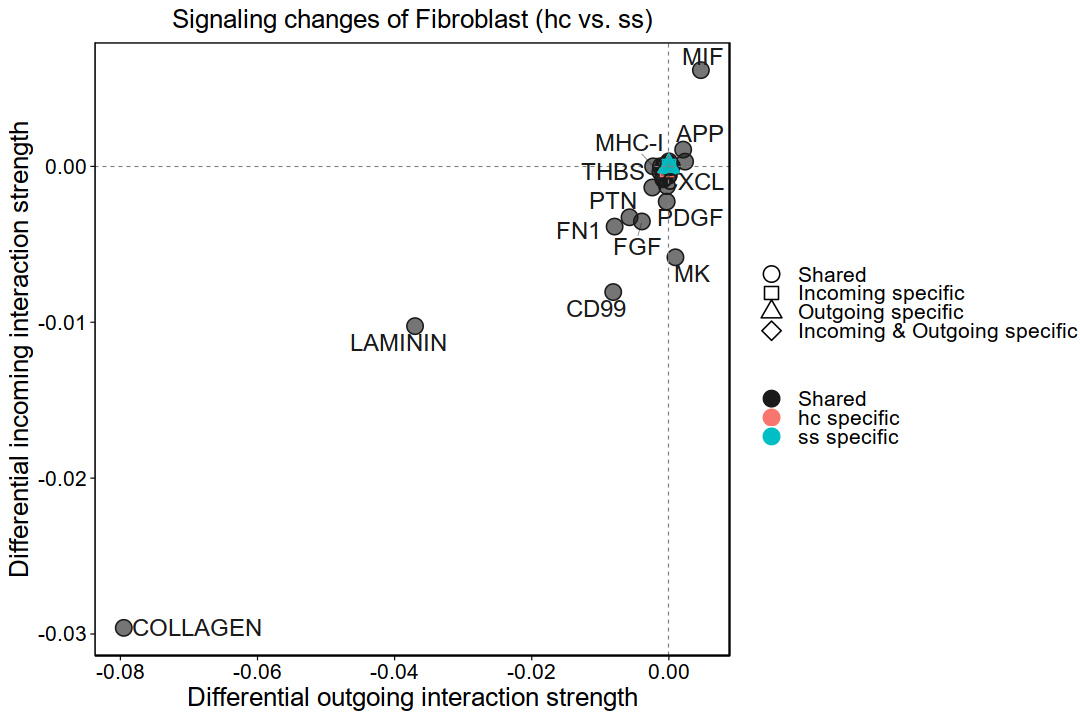

In [137]:
gg5

## show overall interactions of Fibroblast 

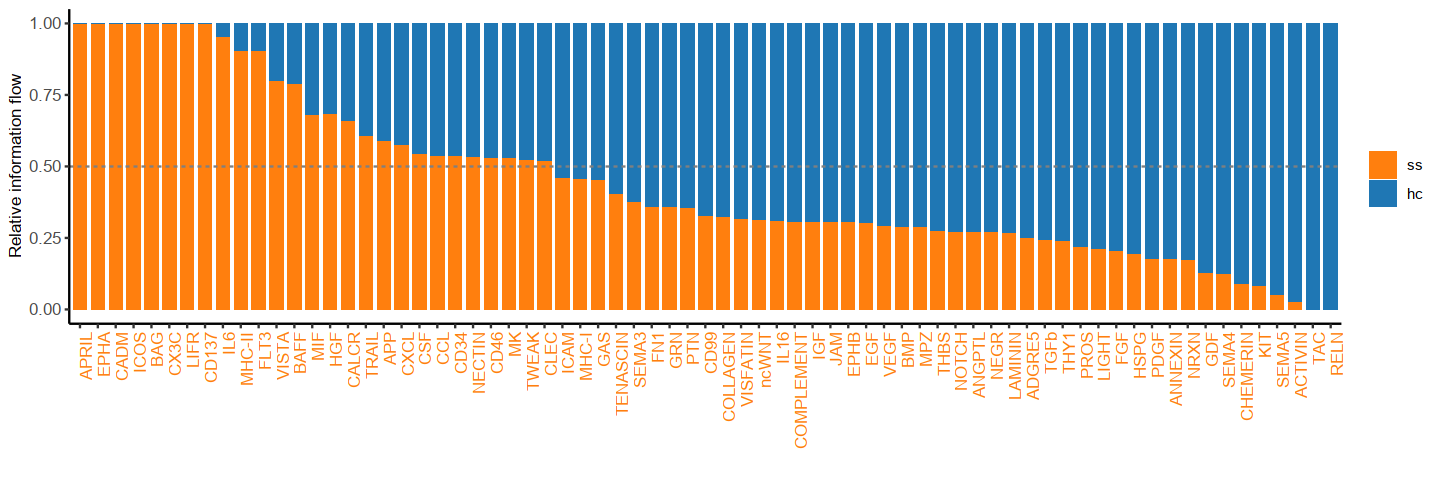

In [142]:
options(repr.plot.width=12, repr.plot.height=4)
rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c(7), stacked = T, do.stat = FALSE,cutoff.pvalue = 0.05,thresh = 0.05,
        color.use=c('#ff7f0e','#1f77b4'),do.flip = FALSE,x.angle=90,font.size = 10)
ggsave("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Fibroblast_sources-interactions_ss_hc.pdf",width = 12,height = 4)

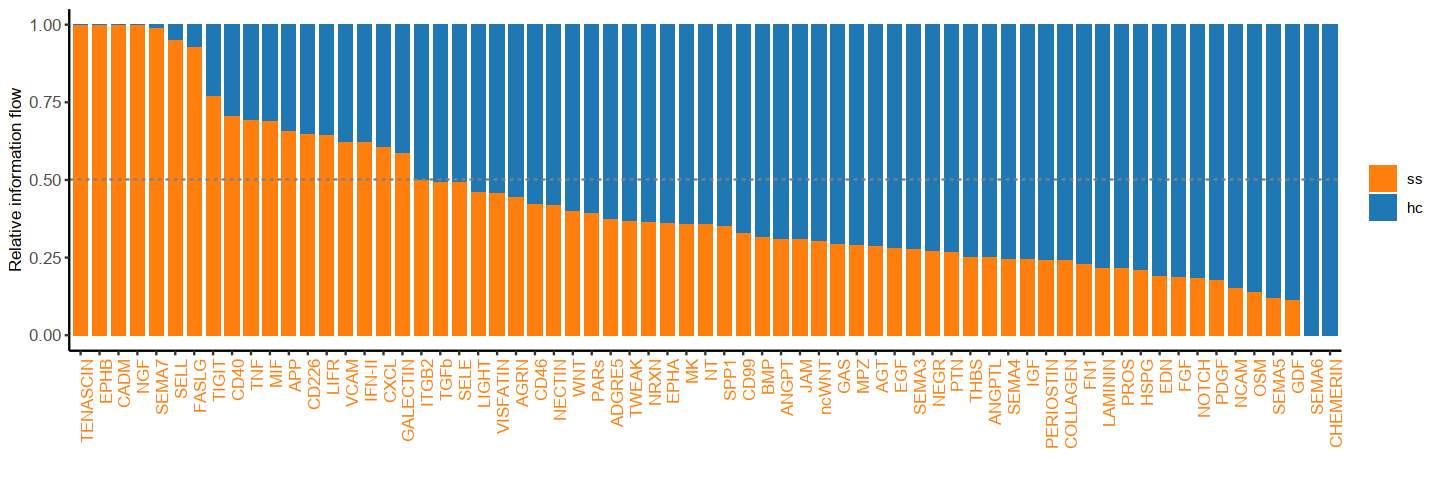

In [143]:
options(repr.plot.width=12, repr.plot.height=4)
rankNet(cellchat, mode = "comparison", measure = "weight", targets.use = c(7), stacked = T, do.stat = FALSE,cutoff.pvalue = 0.05,thresh = 0.05,
        color.use=c('#ff7f0e','#1f77b4'),do.flip = FALSE,x.angle=90,font.size = 10)
ggsave("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Fibroblast_targets-interactions_ss_hc.pdf",width = 12,height = 4)

# show overall interactions of changes

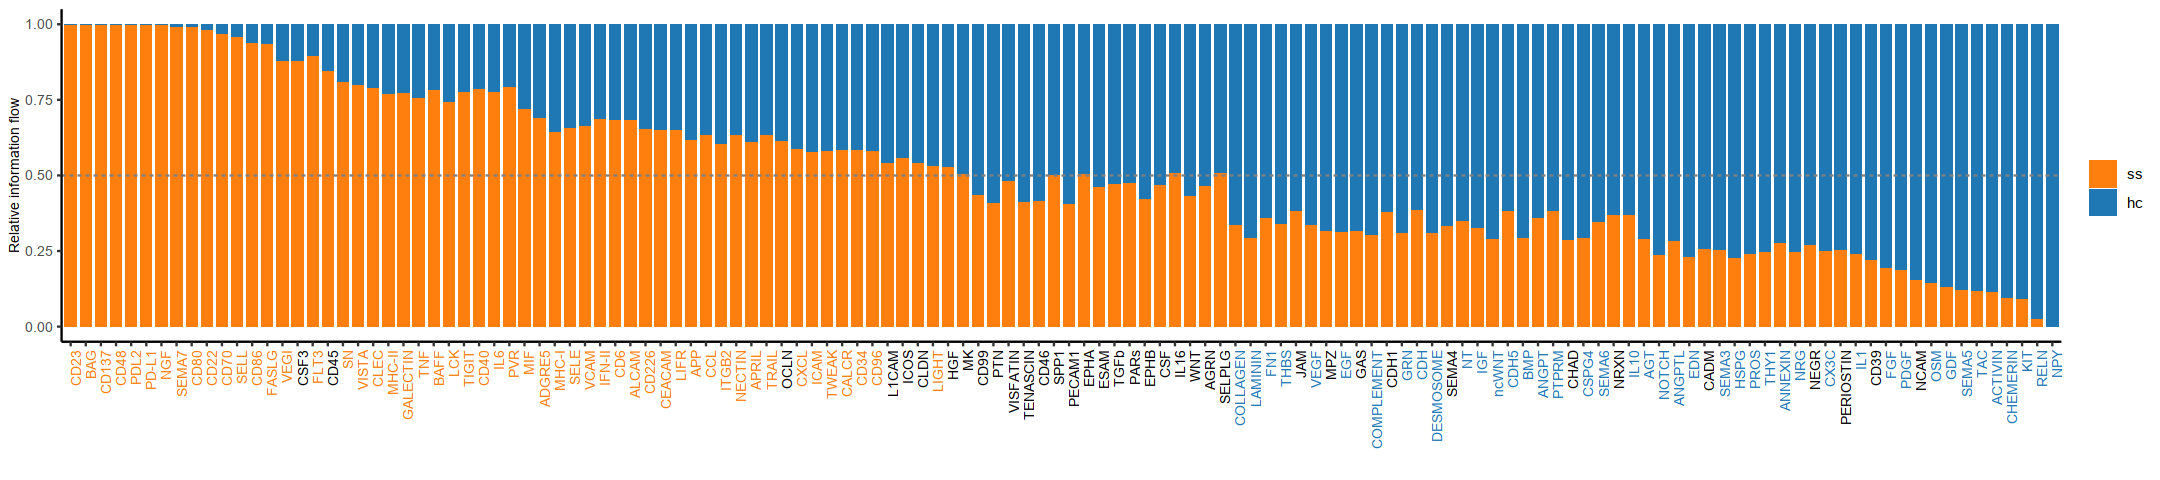

In [134]:
options(repr.plot.width=18, repr.plot.height=4)
rankNet(cellchat, mode = "comparison", measure = "weight",stacked = T, do.stat = TRUE,cutoff.pvalue = 0.05,thresh = 0.05,
        color.use=c('#ff7f0e','#1f77b4'),do.flip = FALSE,x.angle=90,font.size = 8)
ggsave("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Overall_interactions_ss_hc.pdf",width = 18,height = 4)

In [67]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.7.11
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [135]:
pathway.changes=c('CD23','BAG','CD137','CD48','PDL2','PD-L1','NGF','SEMA7','CD80','CD22','CD70','SELL','CD86','FASLG','VEGI')

In [143]:
pdf("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Increased_top15_interactions_ss_hc.pdf",width = 10, height = 6)
options(repr.plot.width=10, repr.plot.height=6)
i = 1
ht1 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "all", signaling = pathway.changes, title = names(object.list)[i], width = 10, height = 10, color.heatmap = "OrRd")
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "all", signaling = pathway.changes, title = names(object.list)[i+1], width = 10, height = 10, color.heatmap = "OrRd")
draw(ht2 + ht1, ht_gap = unit(0.5, "cm"))
dev.off()

png 
  2

In [144]:
pathway.changes=c('NPY','RELN','KIT','CHEMERIN','ACTIVIN','TAC','SEMA5','GDF','OSM','PDGF','FGF','IL1','CX3C','NRG','ANNEXIN')

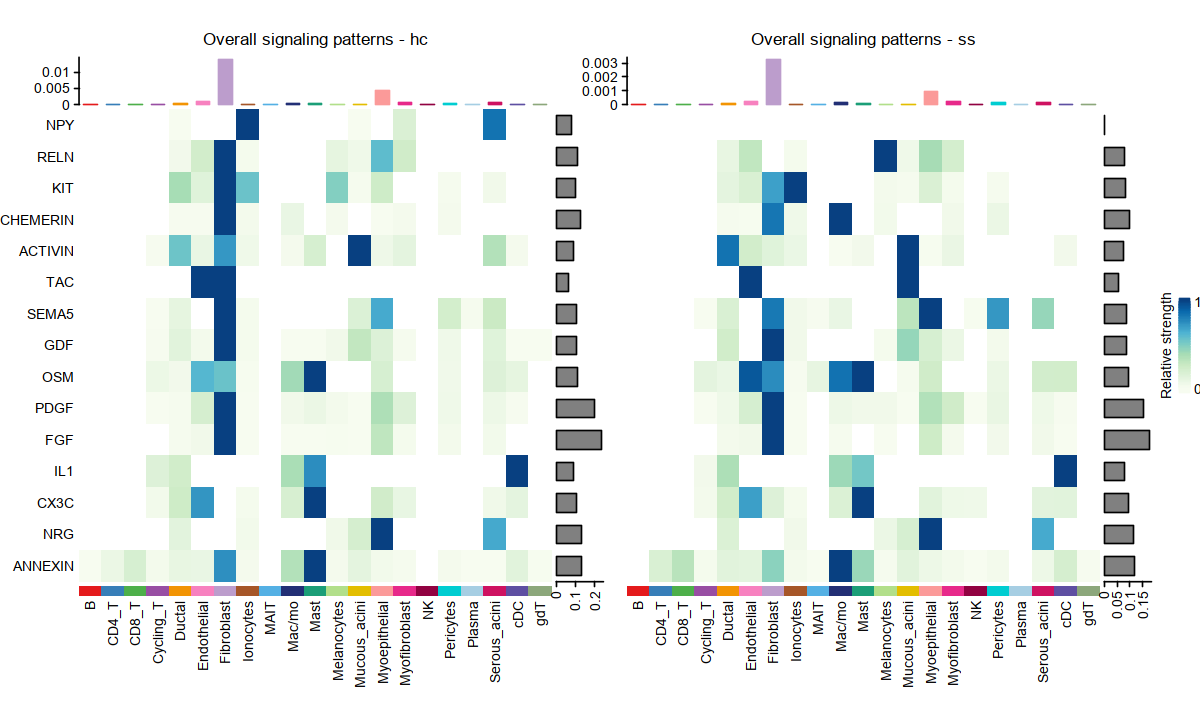

In [151]:
#pdf("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Decreased_top15_interactions_ss_hc.pdf",width = 10, height = 6)
options(repr.plot.width=10, repr.plot.height=6)
i = 1
# combining all the identified signaling pathways from different datasets 
pathway.union <- union(object.list[[i]]@netP$pathways, object.list[[i+1]]@netP$pathways)
ht1 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "all", signaling = pathway.changes, title = names(object.list)[i], width = 10, height = 10, color.heatmap = "GnBu")
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "all", signaling = pathway.changes, title = names(object.list)[i+1], width = 10, height = 10, color.heatmap = "GnBu")
draw(ht2 + ht1, ht_gap = unit(0.5, "cm"))
#dev.off()

[1] "#F7FBFF" "#DEEBF7" "#C6DBEF" "#9ECAE1" "#6BAED6" "#4292C6" "#2171B5"
[8] "#08519C" "#08306B"

[1] "#FFFFCC" "#FFEDA0" "#FED976" "#FEB24C" "#FD8D3C" "#FC4E2A" "#E31A1C"
[8] "#BD0026" "#800026"

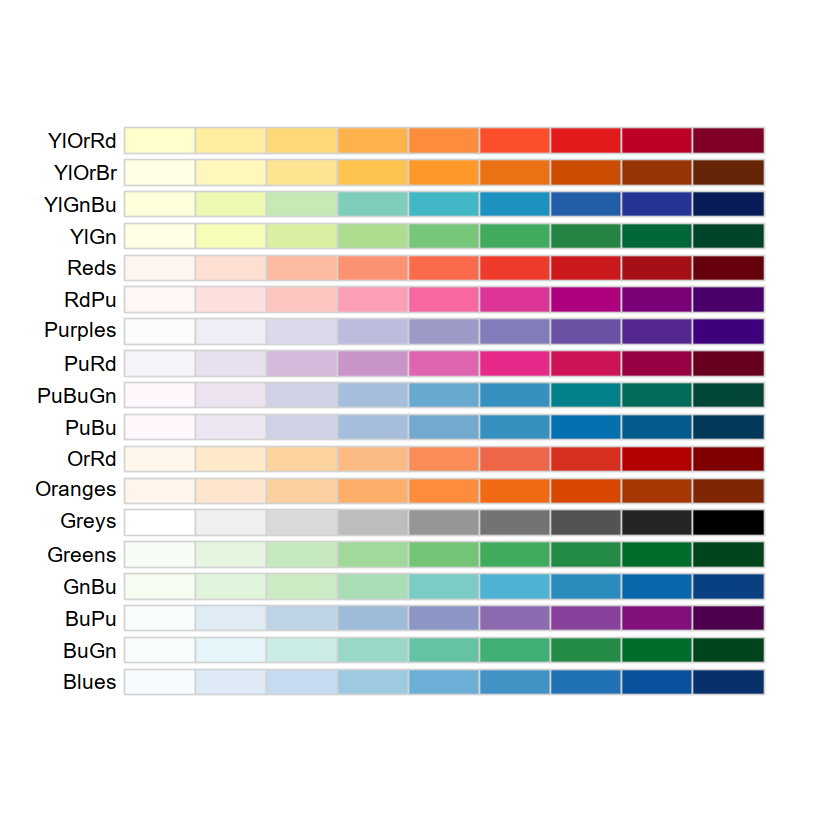

In [3]:
library(RColorBrewer)
display.brewer.all(type = "seq")
brewer.pal(9,'Blues')
brewer.pal(9,'YlOrRd')

# show up/down-regulated receptor/ligands

In [ ]:
Sender-Source-Outgoing-ligand
Receiver-Incoming-receptor

## Identify genes by differential analysis

In [145]:
# define a positive dataset, i.e., the dataset with positive fold change against the other dataset
pos.dataset = "ss"
# define a char name used for storing the results of differential expression analysis
features.name = pos.dataset
# perform differential expression analysis
cellchat <- identifyOverExpressedGenes(cellchat, group.dataset = "datasets", pos.dataset = pos.dataset, features.name = features.name, only.pos = FALSE, thresh.pc = 0.1, thresh.fc = 0.1, thresh.p = 1)


Use the joint cell labels from the merged CellChat object



In [146]:
# map the results of differential expression analysis onto the inferred cell-cell communications to easily manage/subset the ligand-receptor pairs of interest
net <- netMappingDEG(cellchat, features.name = features.name)

In [459]:
# extract the ligand-receptor pairs with upregulated ligands in SS
net.up <- subsetCommunication(cellchat, net = net, datasets = "ss",thresh=0.01, ligand.logFC = 0.1, receptor.logFC = 0.1)
# extract the ligand-receptor pairs with upregulated ligands and upregulated recetptors in hc, i.e.,downregulated in SS
net.down <- subsetCommunication(cellchat, net = net, datasets = "hc",thresh=0.01, ligand.logFC = -0.1,receptor.logFC = -0.1)

In [460]:
### Output differential expression of focused cell-types
dim(net.up);dim(net.down)
write.csv(net.up,'/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Increased_interactions.csv',row.names=FALSE)
write.csv(net.down,'/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Decreased_interactions.csv',row.names=FALSE)
#subset(net.up, source %in% c('CD4_T','B','Myoepithelial','Fibroblast','Endothelial') & target %in% c('CD4_T','B','Myoepithelial','Fibroblast','Endothelial') )

[1] 1612   20

[1] 2753   20

## Count increased ligand/receptor interaction signaling

** increased

In [307]:
net.up.sub=subset(net.up, source == 'Fibroblast')
dim(net.up.sub)

[1] 85 20

In [313]:
counts=table(net.up.sub$pathway_name)
counts=sort(counts)
pdf('./analysis_result/Fig5/Increased_Fibroblast_Source_Pathway.pdf',width = 6,height = 6)
par(mar=c(4,8,4,4))
p=barplot(counts,  horiz=TRUE, main="Signaling pathways",xlab="Number of interactions", col = "#FCBBA1", las=1)
text(0,p,round(counts, 1),cex=1,pos=4)
dev.off()

png 
  2

In [316]:
net.up.sub=subset(net.up, target == 'Fibroblast')
head(net.up.sub)
dim(net.up.sub)

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,evidence,datasets,ligand.logFC,ligand.pct.1,ligand.pct.2,ligand.pvalues,receptor.logFC,receptor.pct.1,receptor.pct.2,receptor.pvalues
,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
162,Endothelial,Fibroblast,CXCL11,ACKR3,1.463622e-05,0,CXCL11_ACKR3,CXCL11 - ACKR3,CXCL,Secreted Signaling,KEGG: hsa04060,ss,0.8894618,0.238,0.023,4.533381e-77,0.4306019,0.339,0.166,5.09789e-108
165,Fibroblast,Fibroblast,CXCL12,ACKR3,6.470971e-04,0,CXCL12_ACKR3,CXCL12 - ACKR3,CXCL,Secreted Signaling,KEGG: hsa04060,ss,0.2237826,0.961,0.917,4.489915e-65,0.4306019,0.339,0.166,5.09789e-108
166,Mac/mo,Fibroblast,CXCL12,ACKR3,8.750454e-06,0,CXCL12_ACKR3,CXCL12 - ACKR3,CXCL,Secreted Signaling,KEGG: hsa04060,ss,0.1807264,0.421,0.276,1.316278e-04,0.4306019,0.339,0.166,5.09789e-108
167,Myofibroblast,Fibroblast,CXCL12,ACKR3,2.327082e-05,0,CXCL12_ACKR3,CXCL12 - ACKR3,CXCL,Secreted Signaling,KEGG: hsa04060,ss,0.2328422,0.459,0.295,9.210605e-10,0.4306019,0.339,0.166,5.09789e-108
168,Pericytes,Fibroblast,CXCL12,ACKR3,4.481769e-05,0,CXCL12_ACKR3,CXCL12 - ACKR3,CXCL,Secreted Signaling,KEGG: hsa04060,ss,0.2293273,0.776,0.721,2.521847e-02,0.4306019,0.339,0.166,5.09789e-108
285,CD4_T,Fibroblast,MIF,CD74_CD44,7.666721e-04,0,MIF_CD74_CD44,MIF - (CD74+CD44),MIF,Secreted Signaling,PMID: 29637711; PMID: 26175090,ss,0.1110119,0.777,0.638,6.598456e-05,1.3759323,0.694,0.270,0.00000e+00


[1] 55 20

In [315]:
counts=table(net.up.sub$pathway_name)
counts=sort(counts)
pdf('./analysis_result/Fig5/Increased_Fibroblast_Target_Pathway.pdf',width = 6,height = 6)
par(mar=c(4,8,4,4))
p=barplot(counts,  horiz=TRUE, main="Signaling pathways",xlab="Number of interactions", col = "#FCBBA1", las=1)
text(0,p,round(counts, 1),cex=1,pos=4)
dev.off()

png 
  2

** decreased

In [317]:
net.down.sub=subset(net.down, source == 'Fibroblast')
dim(net.down.sub)

[1] 413  20

In [318]:
counts=table(net.down.sub$pathway_name)
counts=sort(counts)
# Increase margin size
pdf('./analysis_result/Fig5/Decreased_Fibroblast_Source_Pathway.pdf',width = 6,height = 6)
par(mar=c(4,8,4,4))
p=barplot(counts,  horiz=TRUE, main="Signaling pathways",xlab="Number of interactions", col = "#CCECE6", las=1)
text(0,p,round(counts, 1),cex=1,pos=4)
dev.off()

png 
  2

In [319]:
net.down.sub=subset(net.down, target == 'Fibroblast')
dim(net.down.sub)

[1] 169  20

In [320]:
counts=table(net.down.sub$pathway_name)
counts=sort(counts)
pdf('./analysis_result/Fig5/Decreased_Fibroblast_Target_Pathway.pdf',width = 6,height = 6)
par(mar=c(4,8,4,4))
p=barplot(counts,  horiz=TRUE, main="Signaling pathways",xlab="Number of interactions", col = "#CCECE6", las=1)
text(0,p,round(counts, 1),cex=1,pos=4)
dev.off()

png 
  2

In [208]:
gene.up <- extractGeneSubsetFromPair(net.up, cellchat)
gene.down <- extractGeneSubsetFromPair(net.down, cellchat)

pairLR.use.up = net.up[, "interaction_name", drop = F]

In [ ]:
gg1 <- netVisual_bubble(cellchat, sources.use = 4, targets.use = c(5:11),  comparison = c(1, 2), max.dataset = 2, title.name = "Increased signaling in LS", angle.x = 45, remove.isolate = T)
#> Comparing communications on a merged object
gg2 <- netVisual_bubble(cellchat, sources.use = 4, targets.use = c(5:11),  comparison = c(1, 2), max.dataset = 1, title.name = "Decreased signaling in LS", angle.x = 45, remove.isolate = T)
#> Comparing communications on a merged object
gg1 + gg2


Comparing communications on a merged object 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


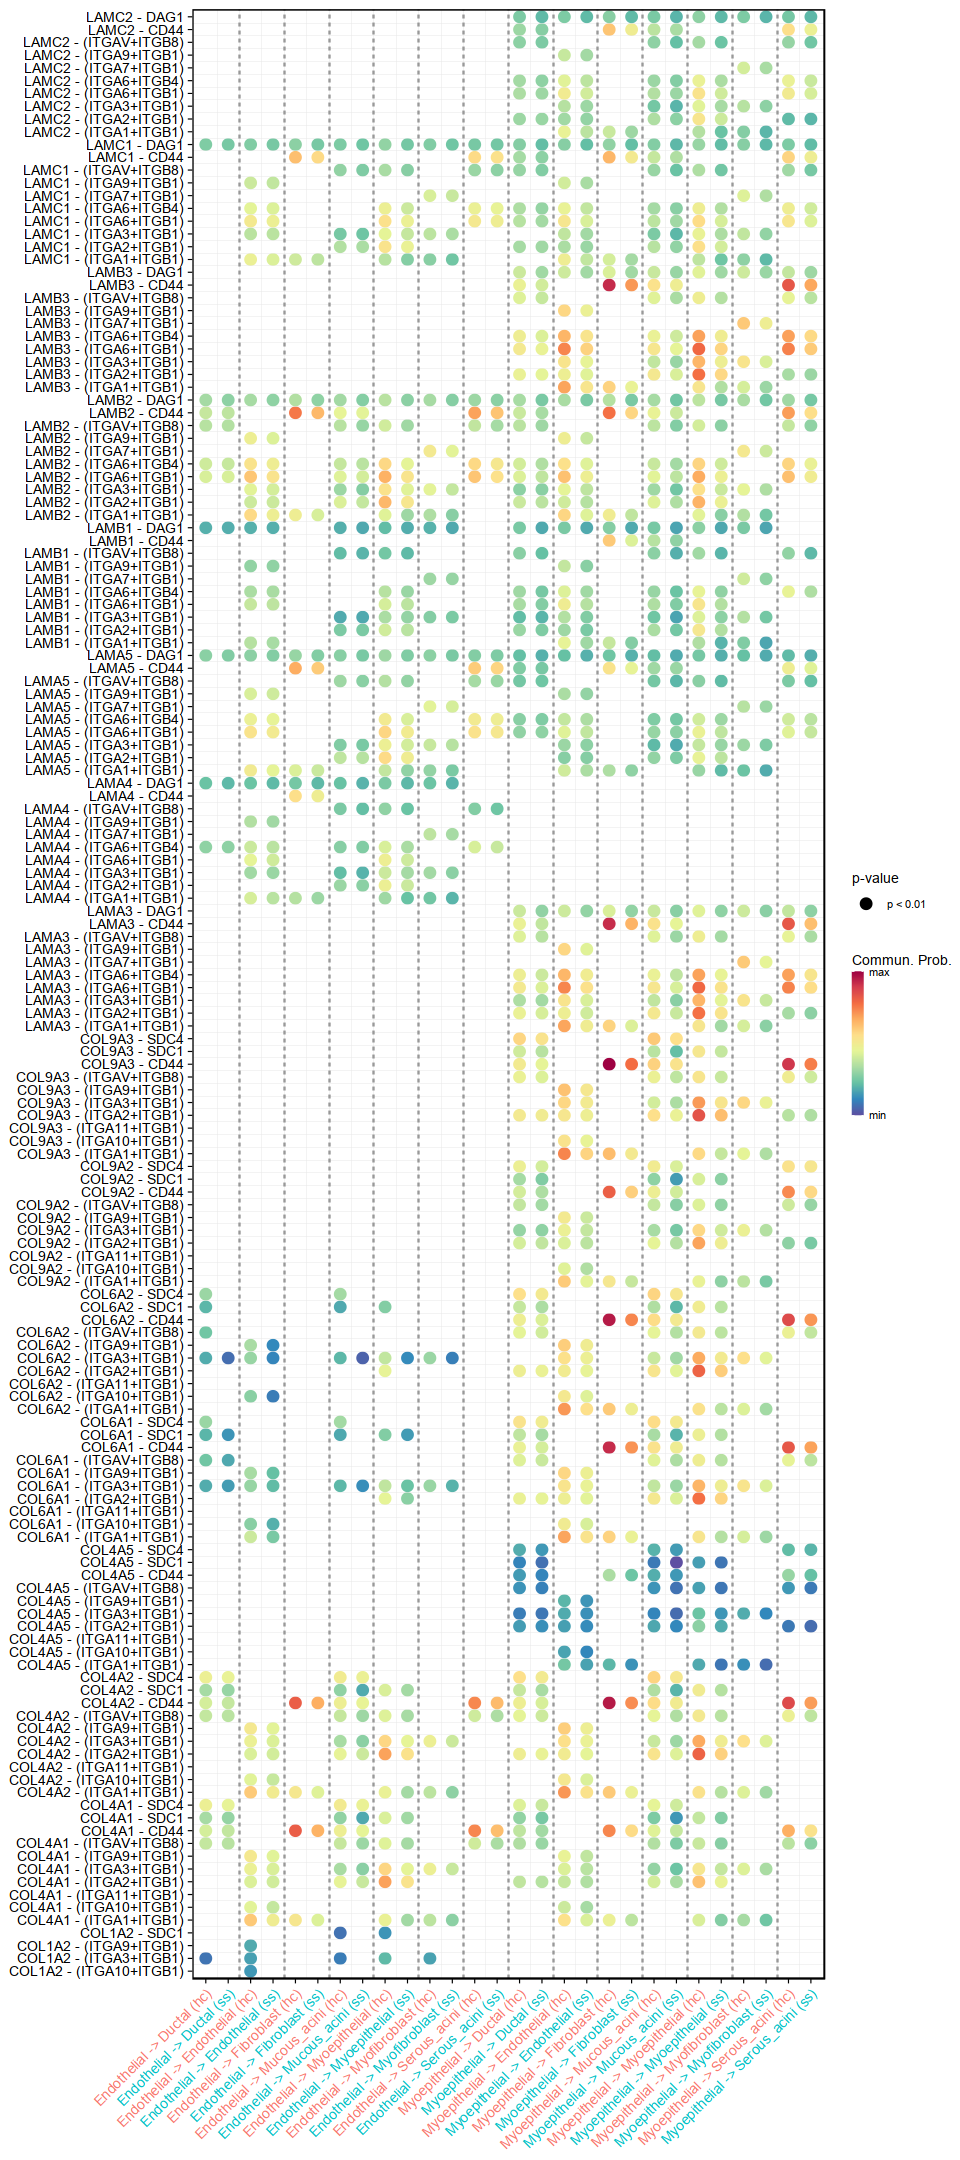

In [50]:
options(repr.plot.width=8, repr.plot.height=18)
netVisual_bubble(cellchat, sources.use = c(14,6), targets.use = c(5,6,7,13,14,15,19),  signaling = c('LAMININ','COLLAGEN'), pairLR.use = NULL, thresh = 0.01, max.dataset = 2,
                 comparison = c(2, 1), angle.x = 45,line.size = 0.5,font.size = 14)

In [16]:
'B','CD4_T','CD8_T','Cycling_T'
'Ductal','Endothelial','Fibroblast','Ionocytes'
'MAIT','Mac/mo','Mast','Melanocytes'
'Mucous_acini','Myoepithelial','Myofibroblast','NK'
'Pericytes','Plasma','Serous_acini','cDC'
'gdT'

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected string constant
1: 'B''CD4_T'
       ^


## show interactions of specific cell-types

### Fibroblast cells as the center

**Decreased (interacts with endothelial and endothelial)

In [461]:
#net.down.sub=subset(net.down, source %in% c('Fibroblast','Serous_acini','Myoepithelial','Endothelial') & target %in% c('Fibroblast','Serous_acini','Myoepithelial','Endothelial'))


[1] 413  21

In [494]:
# Source
net.down.sub=subset(net.down, source %in% c('Fibroblast'))
net.down.sub$source_target=paste0(net.down.sub$source,'_',net.down.sub$target)
dim(net.down.sub)
net.down.sub1=subset(net.down.sub, source_target %in% c('Fibroblast_Fibroblast','Fibroblast_Endothelial','Fibroblast_Myoepithelial','Fibroblast_Serous_acini'))
dim(net.down.sub1)
pathways=sort(table(net.down.sub1$pathway_name),decreasing = TRUE)

[1] 413  21

[1] 188  21

In [495]:
# Target
net.down.sub=subset(net.down, target %in% c('Fibroblast'))
net.down.sub$source_target=paste0(net.down.sub$source,'_',net.down.sub$target)
dim(net.down.sub)
net.down.sub2=subset(net.down.sub, source_target %in% c('Serous_acini_Fibroblast','Endothelial_Fibroblast','Myoepithelial_Fibroblast','Fibroblast_Fibroblast'))
dim(net.down.sub2)
pathways=sort(table(net.down.sub2$pathway_name),decreasing = TRUE)

[1] 169  21

[1] 54 21

In [496]:
head(net.down.sub1)
pathways

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,⋯,datasets,ligand.logFC,ligand.pct.1,ligand.pct.2,ligand.pvalues,receptor.logFC,receptor.pct.1,receptor.pct.2,receptor.pvalues,source_target
,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56,Fibroblast,Myoepithelial,GDF11,TGFBR1_ACVR2A,1.675350e-06,0,GDF11_TGFBR1_ACVR2A,GDF11 - (TGFBR1+ACVR2A),GDF,Secreted Signaling,⋯,hc,-0.1399165,0.122,0.150,7.562360e-09,-0.1302814,0.235,0.250,1.441336e-02,Fibroblast_Myoepithelial
78,Fibroblast,Myoepithelial,WNT5B,FZD7,3.391031e-05,0,WNT5B_FZD7,WNT5B - FZD7,ncWNT,Secreted Signaling,⋯,hc,-0.1270624,0.214,0.233,1.228230e-05,-0.1066069,0.363,0.333,8.452279e-01,Fibroblast_Myoepithelial
215,Fibroblast,Endothelial,FGF10,FGFR1,1.757877e-05,0,FGF10_FGFR1,FGF10 - FGFR1,FGF,Secreted Signaling,⋯,hc,-0.1292923,0.211,0.206,1.089719e-01,-0.2517607,0.262,0.298,3.828274e-06,Fibroblast_Endothelial
216,Fibroblast,Fibroblast,FGF10,FGFR1,3.615768e-04,0,FGF10_FGFR1,FGF10 - FGFR1,FGF,Secreted Signaling,⋯,hc,-0.1292923,0.211,0.206,1.089719e-01,-0.3186026,0.685,0.721,3.317845e-80,Fibroblast_Fibroblast
220,Fibroblast,Myoepithelial,FGF10,FGFR1,9.251001e-05,0,FGF10_FGFR1,FGF10 - FGFR1,FGF,Secreted Signaling,⋯,hc,-0.1292923,0.211,0.206,1.089719e-01,-0.2880217,0.643,0.679,1.074009e-24,Fibroblast_Myoepithelial
223,Fibroblast,Myoepithelial,FGF10,FGFR2,3.008776e-05,0,FGF10_FGFR2,FGF10 - FGFR2,FGF,Secreted Signaling,⋯,hc,-0.1292923,0.211,0.206,1.089719e-01,-0.2176927,0.321,0.367,2.510122e-08,Fibroblast_Myoepithelial



COLLAGEN  LAMININ     PDGF      FGF      FN1      JAM    NOTCH   ANGPTL 
      15       11       10        3        3        3        3        2 
     EGF      EDN      PTN 
       2        1        1 

In [470]:
extract_interactions <- function(pathways=NULL,net.down.sub=NULL,num=10){
    pairLR.use <- c()
    for (k in 1:length(names(pathways))) {
        sub=subset(net.down.sub, pathway_name==names(pathways)[k])
        interactions=as.character(na.omit(unique(sub$interaction_name)[1:num]))
        #print (interactions)
        pairLR.use <- c(pairLR.use,interactions)
        #print (pairLR.use)
    }
    return (pairLR.use)
}

In [476]:
# Define interaction names
pairLR.use <- extract_interactions(pathways,net.down.sub1)
pairLR.use <- as.data.frame(pairLR.use)
colnames(pairLR.use)=c('interaction_name')
# Define target and source cell names
sources.use = c(7)
targets.use = c(6,7,14,19)
signaling=c('COLLAGEN','LAMININ','FN1','EGF','FGF','NOTCH')

Comparing communications on a merged object 




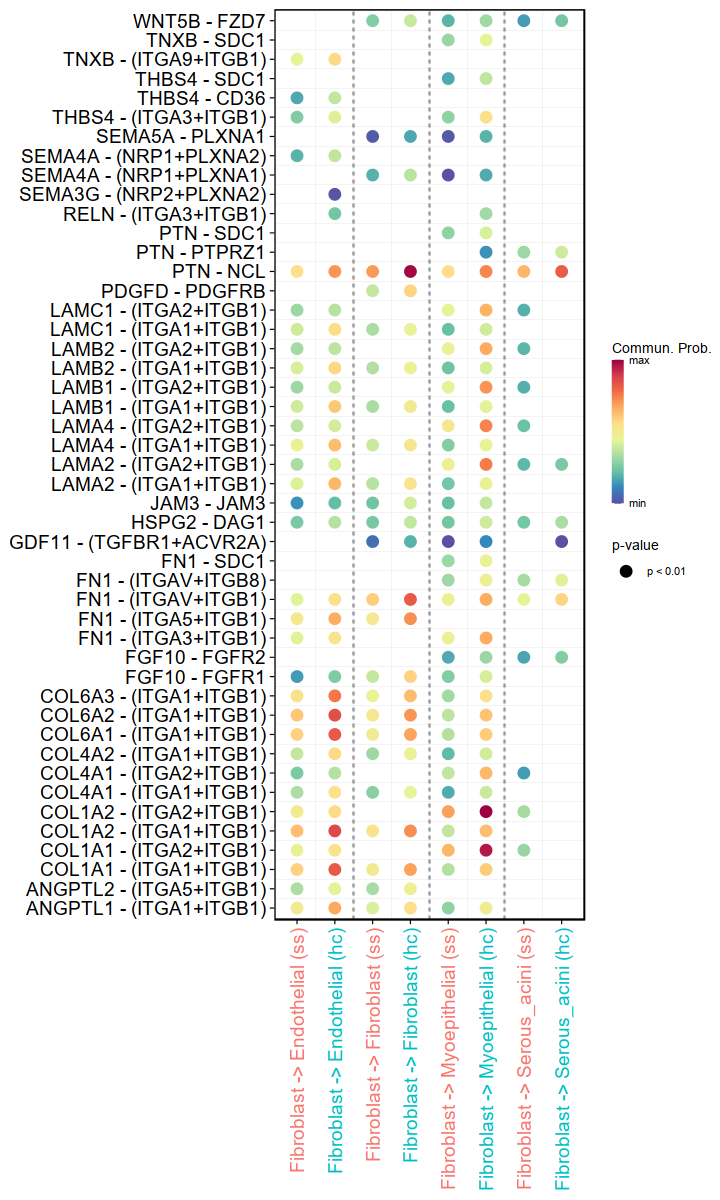

In [479]:
options(repr.plot.width=6, repr.plot.height=10)
netVisual_bubble(cellchat, sources.use = sources.use, targets.use = targets.use, signaling = NULL, pairLR.use = pairLR.use, remove.isolate = FALSE,
                 comparison = c(1, 2), angle.x = 90,line.size = 0.5,font.size = 14)
ggsave("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Fibroblast_source-cells_Decreased-interactions.pdf",width = 6,height = 10)

**Increased (interacts with CD4+ and B cells)

In [483]:
net.up.sub=subset(net.up, source %in% c('Fibroblast'))
net.up.sub$source_target=paste0(net.up.sub$source,'_',net.up.sub$target)
dim(net.up.sub)

[1] 85 21

In [484]:
# Source
net.up.sub1=subset(net.up.sub, source_target %in% c('Fibroblast_Fibroblast','Fibroblast_CD4_T','Fibroblast_B'))
dim(net.up.sub1)
pathways=sort(table(net.up.sub1$pathway_name),decreasing = TRUE)

[1] 15 21

In [486]:
head(net.up.sub1)
pathways

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,⋯,datasets,ligand.logFC,ligand.pct.1,ligand.pct.2,ligand.pvalues,receptor.logFC,receptor.pct.1,receptor.pct.2,receptor.pvalues,source_target
,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
64,Fibroblast,CD4_T,CCL19,CCR7,4.671123e-06,0,CCL19_CCR7,CCL19 - CCR7,CCL,Secreted Signaling,⋯,ss,1.1290947,0.122,0.033,6.938825e-73,0.3967131,0.3860,0.215,9.234117e-13,Fibroblast_CD4_T
148,Fibroblast,B,CXCL12,CXCR4,2.249678e-03,0,CXCL12_CXCR4,CXCL12 - CXCR4,CXCL,Secreted Signaling,⋯,ss,0.2237826,0.961,0.917,4.489915e-65,0.1194943,0.8410,0.648,7.304466e-02,Fibroblast_B
165,Fibroblast,Fibroblast,CXCL12,ACKR3,6.470971e-04,0,CXCL12_ACKR3,CXCL12 - ACKR3,CXCL,Secreted Signaling,⋯,ss,0.2237826,0.961,0.917,4.489915e-65,0.4306019,0.3390,0.166,5.097890e-108,Fibroblast_Fibroblast
182,Fibroblast,B,MIF,CD74_CXCR4,1.764055e-03,0,MIF_CD74_CXCR4,MIF - (CD74+CXCR4),MIF,Secreted Signaling,⋯,ss,0.3364692,0.864,0.637,3.502890e-184,0.1194943,0.8410,0.648,7.304466e-02,Fibroblast_B
200,Fibroblast,CD4_T,MIF,CD74_CXCR4,8.634987e-04,0,MIF_CD74_CXCR4,MIF - (CD74+CXCR4),MIF,Secreted Signaling,⋯,ss,0.3364692,0.864,0.637,3.502890e-184,0.1087106,0.6945,0.577,1.991785e-01,Fibroblast_CD4_T
250,Fibroblast,B,MIF,CD74_CD44,1.364644e-03,0,MIF_CD74_CD44,MIF - (CD74+CD44),MIF,Secreted Signaling,⋯,ss,0.3364692,0.864,0.637,3.502890e-184,0.1802209,0.6820,0.629,8.633546e-02,Fibroblast_B



  MIF    MK  CXCL  CADM   CCL CD137   IL6 
    6     3     2     1     1     1     1 

In [487]:
# Define interaction names
pairLR.use <- extract_interactions(pathways,net.up.sub1)
pairLR.use <- as.data.frame(pairLR.use)
colnames(pairLR.use)=c('interaction_name')
# Define target and source cell names
sources.use = c(7)
targets.use = c(1,2,7)

Comparing communications on a merged object 




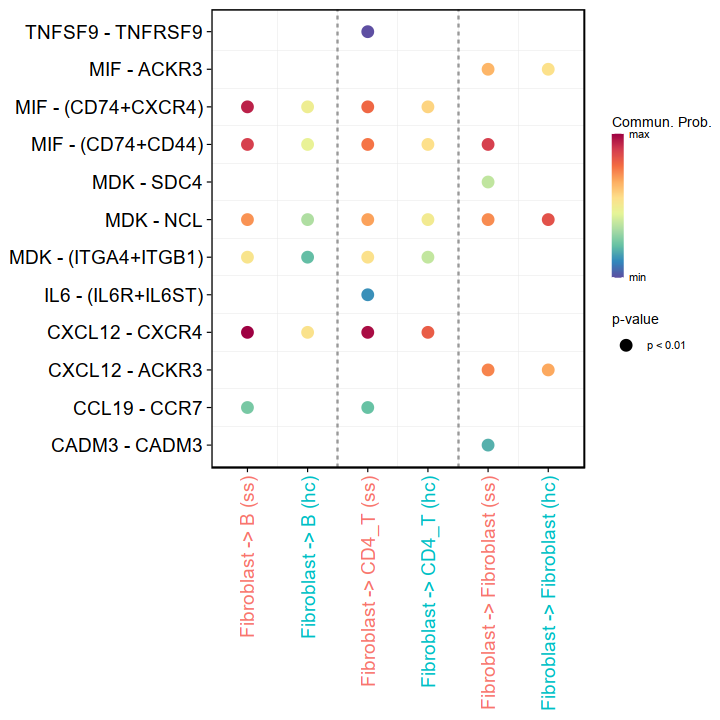

In [490]:
options(repr.plot.width=6, repr.plot.height=6)
netVisual_bubble(cellchat, sources.use = sources.use, targets.use = targets.use, signaling = NULL, pairLR.use = pairLR.use, remove.isolate = FALSE,
                 comparison = c(1, 2), angle.x = 90,line.size = 0.5,font.size = 14)
ggsave("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Fibroblast_source-cells_Increased-interactions.pdf",width = 6,height = 6)

In [491]:
net.up.sub=subset(net.up, target %in% c('Fibroblast'))
net.up.sub$source_target=paste0(net.up.sub$source,'_',net.up.sub$target)
dim(net.up.sub)

[1] 55 21

In [492]:
# Target
net.up.sub1=subset(net.up.sub, source_target %in% c('Fibroblast_Fibroblast','CD4_T_Fibroblast','B_Fibroblast'))
dim(net.up.sub1)
pathways=sort(table(net.up.sub1$pathway_name),decreasing = TRUE)

[1]  9 21

**** B cells as the center

In [54]:
# Define interaction names
pairLR.use <- c('SPP1_ITGA4_ITGB1','MDK_ITGA4_ITGB1')
pairLR.use <- as.data.frame(pairLR.use)
colnames(pairLR.use)=c('interaction_name')
# Define target and source cell names
sources.use = c(4,6,7,12,13,14,15,17,19)
targets.use = c(1)

Comparing communications on a merged object 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


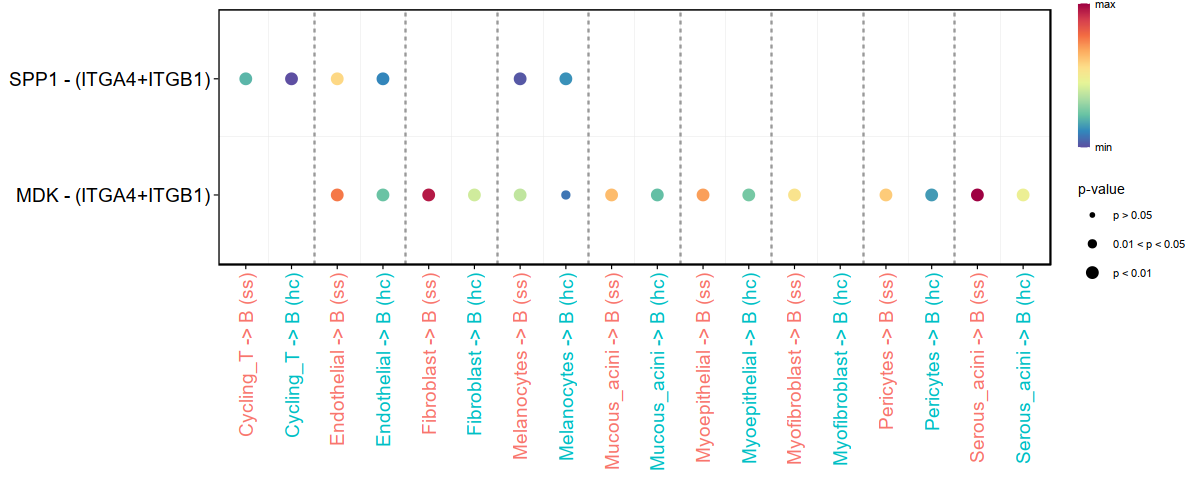

In [56]:
options(repr.plot.width=10, repr.plot.height=4)
netVisual_bubble(cellchat, sources.use = sources.use, targets.use = targets.use, pairLR.use = pairLR.use, remove.isolate = FALSE,
                 comparison = c(1, 2), angle.x = 90,line.size = 0.5,font.size = 14)
ggsave("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/B_target-cells_interactions.pdf",width = 10,height = 4)

In [57]:
# Define interaction names
pairLR.use <- c('ITGA4_ITGB1_VCAM1','ITGA4_ITGB7_VCAM1','HLA-B_CD8A','HLA-F_CD8A','HLA-DQA1_CD4','HLA-DOA_CD4','HLA-DQB1_CD4','HLA-DRA_CD4','HLA-DRB1_CD4',
               'CD86_CD28','CD86_CTLA4','TNFSF9_TNFRSF9','LGALS9_CD44')
pairLR.use <- as.data.frame(pairLR.use)
colnames(pairLR.use)=c('interaction_name')
# Define target and source cell names
sources.use = c(1)
targets.use = c(6,17,4,16,9,10,2,11,19,20)

Comparing communications on a merged object 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


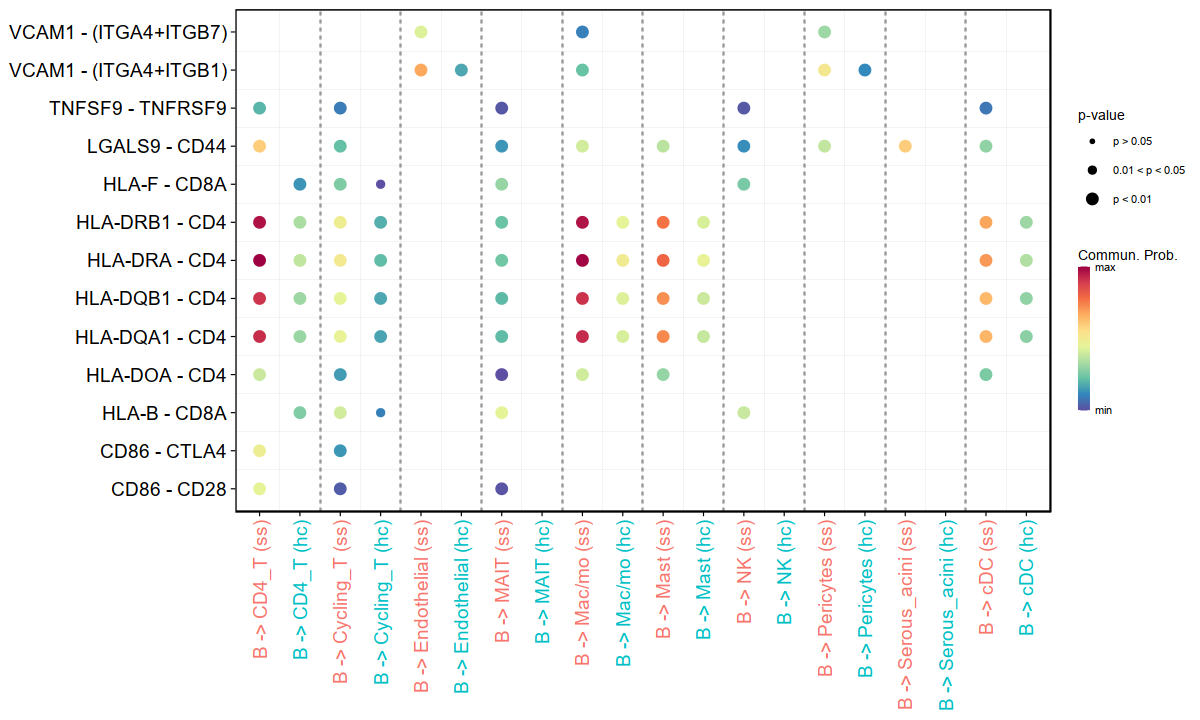

In [64]:
options(repr.plot.width=10, repr.plot.height=6)
netVisual_bubble(cellchat, sources.use = sources.use, targets.use = targets.use, pairLR.use = pairLR.use, remove.isolate = FALSE,
                 comparison = c(1, 2), angle.x = 90,line.size = 0.5,font.size = 14)
ggsave("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/B_source-cells_interactions.pdf",width = 10,height = 6)

**** CD4T cells as the center

In [ ]:
# Define interaction names
pairLR.use <- c('SPP1_ITGA4_ITGB1','MDK_ITGA4_ITGB1')
pairLR.use <- as.data.frame(pairLR.use)
colnames(pairLR.use)=c('interaction_name')
# Define target and source cell names
sources.use = c(4,6,7,12,13,14,15,17,19)
targets.use = c(14)

In [ ]:
options(repr.plot.width=10, repr.plot.height=4)
netVisual_bubble(cellchat, sources.use = sources.use, targets.use = targets.use, pairLR.use = pairLR.use, remove.isolate = FALSE,
                 comparison = c(1, 2), angle.x = 90,line.size = 0.5,font.size = 14)
ggsave("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/B_target-cells_interactions.pdf",width = 10,height = 4)

In [ ]:
# Define interaction names
pairLR.use <- c('ITGA4_ITGB1_VCAM1','ITGA4_ITGB7_VCAM1','HLA-B_CD8A','HLA-F_CD8A','HLA-DQA1_CD4','HLA-DOA_CD4','HLA-DQB1_CD4','HLA-DRA_CD4','HLA-DRB1_CD4',
               'CD86_CD28','CD86_CTLA4','TNFSF9_TNFRSF9','LGALS9_CD44')
pairLR.use <- as.data.frame(pairLR.use)
colnames(pairLR.use)=c('interaction_name')
# Define target and source cell names
sources.use = c(1)
targets.use = c(6,17,4,16,9,10,2,11,19,20)

In [ ]:
options(repr.plot.width=10, repr.plot.height=4)
netVisual_bubble(cellchat, sources.use = sources.use, targets.use = targets.use, pairLR.use = pairLR.use, remove.isolate = FALSE,
                 comparison = c(1, 2), angle.x = 90,line.size = 0.5,font.size = 14)
ggsave("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/B_target-cells_interactions.pdf",width = 10,height = 4)

**** Myoepithelial cells as the center

In [68]:
# Define interaction names
pairLR.use <- c('LAMA2_ITGA1_ITGB1','LAMA3_ITGA1_ITGB1','LAMA4_ITGA1_ITGB1','LAMA5_ITGA1_ITGB1','LAMB1_ITGA1_ITGB1','LAMB2_ITGA1_ITGB1','LAMB3_ITGA1_ITGB1',
                'COL1A1_ITGA1_ITGB1','COL1A2_ITGA1_ITGB1','COL4A1_ITGA1_ITGB1','COL4A2_ITGA1_ITGB1','COL6A1_ITGA1_ITGB1','COL6A2_ITGA1_ITGB1',
               'FGF2_FGFR1','FGF2_FGFR2','FGF7_FGFR1','FGF7_FGFR2','FGF10_FGFR1','FGF10_FGFR2','AREG_EGFR','AREG_EGFR_ERBB2','HBEGF_EGFR','HBEGF_EGFR_ERBB2',
                'TGFB1_TGFBR1_TGFBR2','TGFB2_TGFBR1_TGFBR2','TGFB1_ACVR1_TGFBR1','TGFB2_ACVR1_TGFBR1','TGFB3_ACVR1_TGFBR1')
pairLR.use <- as.data.frame(pairLR.use)
colnames(pairLR.use)=c('interaction_name')
# Define target and source cell names
sources.use = c(7,14,15,12,17,8,5,6,2,3,4,20,21,10,11)
targets.use = c(14)

Comparing communications on a merged object 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


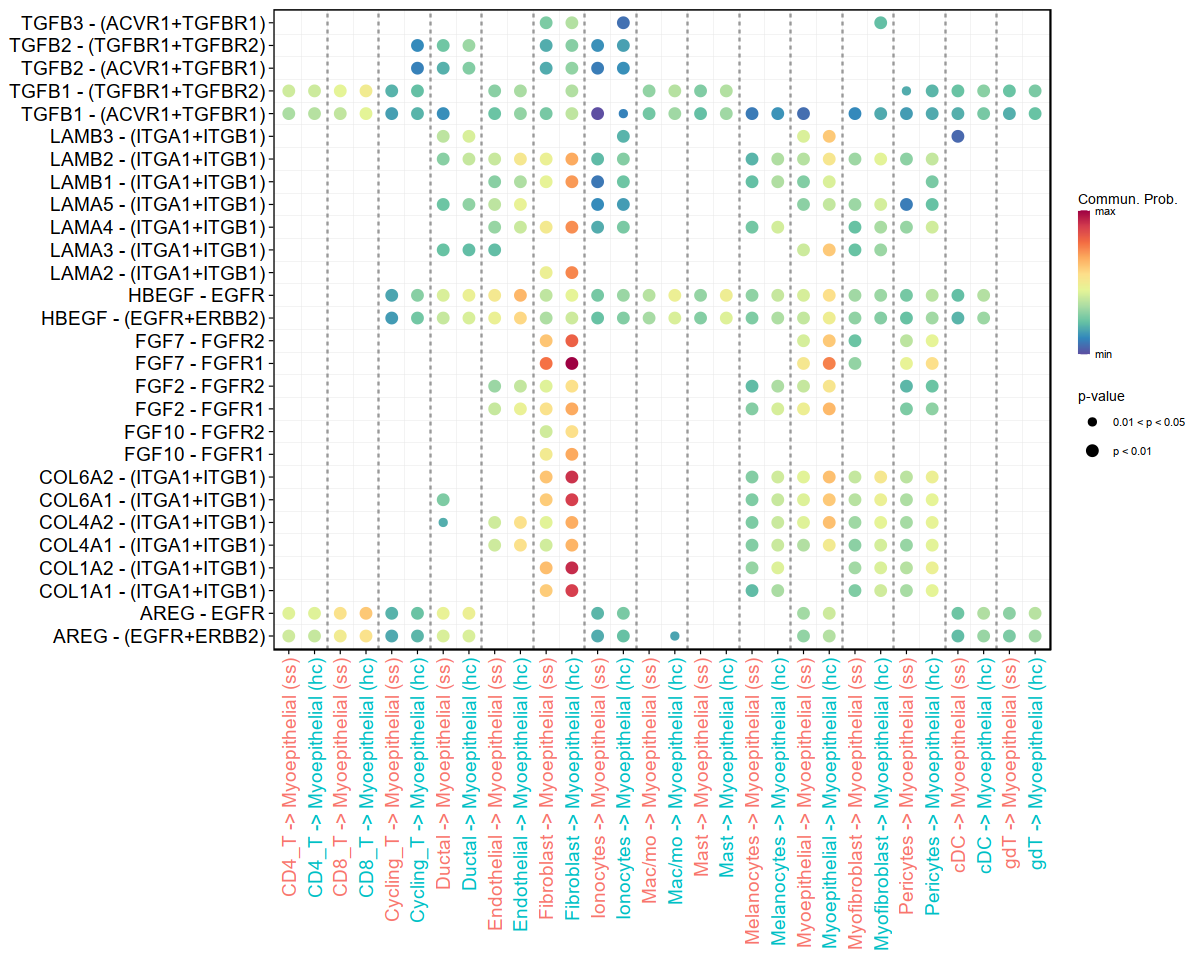

In [71]:
options(repr.plot.width=10, repr.plot.height=8)
netVisual_bubble(cellchat, sources.use = sources.use, targets.use = targets.use, pairLR.use = pairLR.use, remove.isolate = FALSE,
                 comparison = c(1, 2), angle.x = 90,line.size = 0.5,font.size = 14)
ggsave("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Myoepithelial_target-cells_interactions.pdf",width = 10,height = 8)

In [79]:
# Define interaction names
pairLR.use <- c('CDH1_ITGA2_ITGB1','SEMA3C_NRP1_PLXNA2','SEMA3C_NRP2_PLXNA1','SEMA3C_NRP2_PLXNA2','SEMA3C_NRP1_NRP2','SEMA3C_PLXND1','SEMA6D_PLXNA1_TREM2',
                'WNT5A_FZD1','WNT5A_FZD3','WNT5A_MCAM','DLK1_NOTCH3','JAG2_NOTCH3','HBEGF_EGFR','HBEGF_EGFR_ERBB2','FGF2_FGFR1','FGF2_FGFR2','FGF7_FGFR1','FGF7_FGFR2',
                'COL4A1_ITGA1_ITGB1','COL4A2_ITGA1_ITGB1','COL6A1_ITGA1_ITGB1','COL6A2_ITGA1_ITGB1','COL9A2_ITGA1_ITGB1','COL9A3_ITGA1_ITGB1','COL4A1_ITGA2_ITGB1',
                'COL4A2_ITGA2_ITGB1','COL6A1_ITGA2_ITGB1','COL6A2_ITGA2_ITGB1','COL9A2_ITGA2_ITGB1','COL9A3_ITGA2_ITGB1',
                'LAMA3_ITGA1_ITGB1','LAMB1_ITGA1_ITGB1','LAMB2_ITGA1_ITGB1','LAMB3_ITGA1_ITGB1','LAMC1_ITGA1_ITGB1','LAMA3_ITGA2_ITGB1','LAMB1_ITGA2_ITGB1','LAMB2_ITGA2_ITGB1',
                'LAMB3_ITGA2_ITGB1','LAMC1_ITGA2_ITGB1','LAMA3_ITGA3_ITGB1','LAMB1_ITGA3_ITGB1','LAMB2_ITGA3_ITGB1','LAMB3_ITGA3_ITGB1','LAMC1_ITGA3_ITGB1')
pairLR.use <- as.data.frame(pairLR.use)
colnames(pairLR.use)=c('interaction_name')
# Define target and source cell names
sources.use = c(14)
targets.use = c(7,14,15,12,17,8,5,6,4,20,10,11)

Comparing communications on a merged object 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


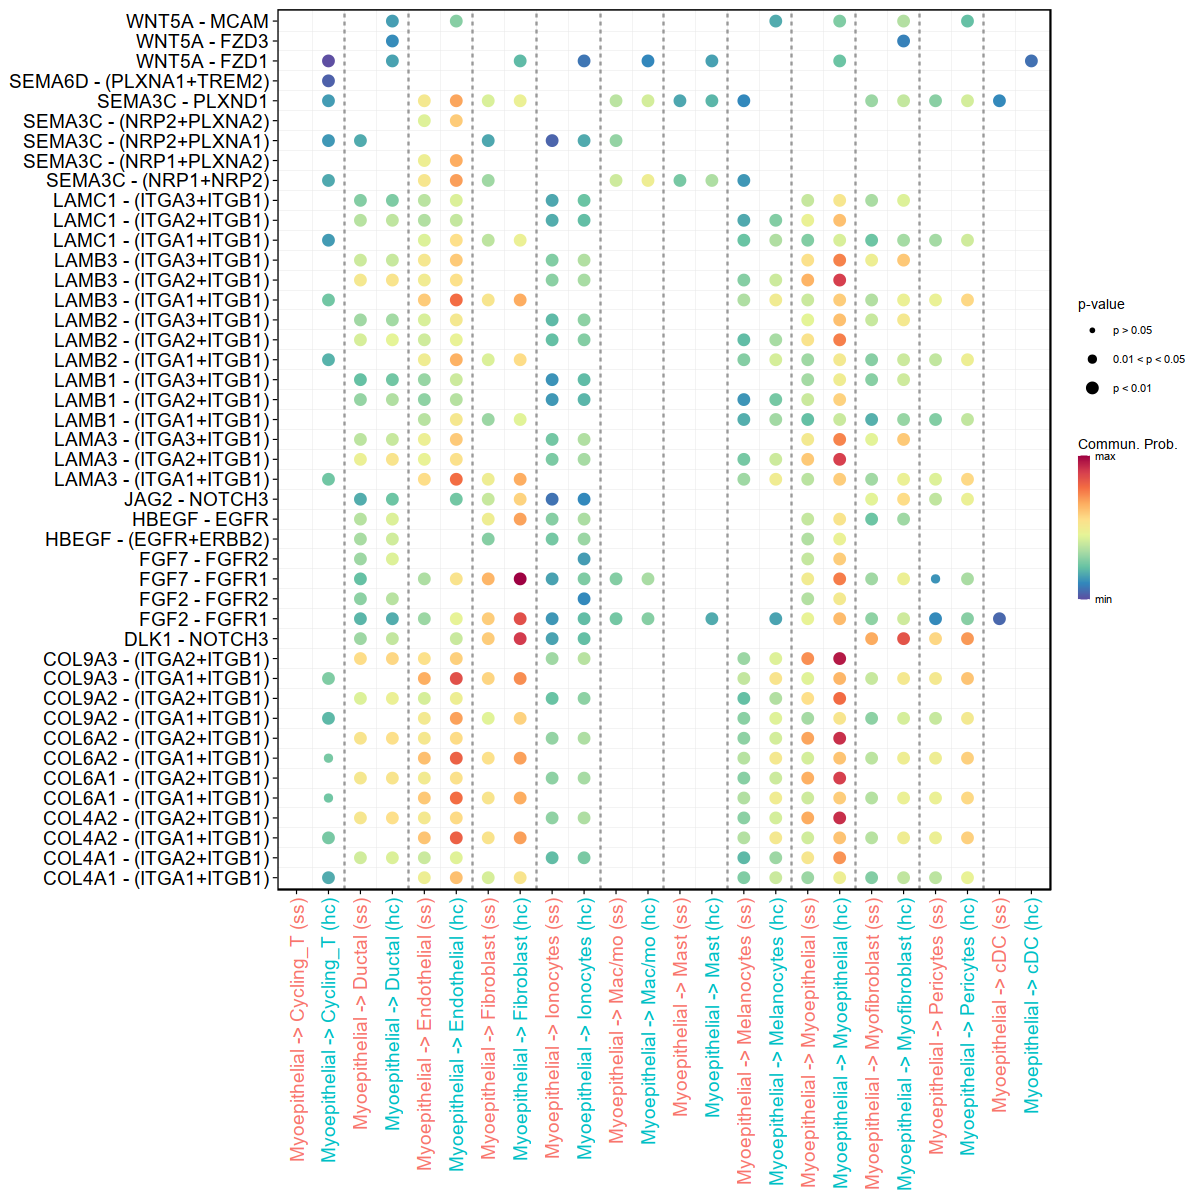

In [80]:
options(repr.plot.width=10, repr.plot.height=10)
netVisual_bubble(cellchat, sources.use = sources.use, targets.use = targets.use, pairLR.use = pairLR.use, remove.isolate = FALSE,
                 comparison = c(1, 2), angle.x = 90,line.size = 0.5,font.size = 14)
ggsave("/home/caipengfei/RNA_seq/Autoimmune_Disease/SjS/analysis_result/Fig5/Myoepithelial_source-cells_interactions.pdf",width = 10,height = 10)

In [16]:
'B','CD4_T','CD8_T','Cycling_T'
'Ductal','Endothelial','Fibroblast','Ionocytes'
'MAIT','Mac/mo','Mast','Melanocytes'
'Mucous_acini','Myoepithelial','Myofibroblast','NK'
'Pericytes','Plasma','Serous_acini','cDC'
'gdT'

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected string constant
1: 'B''CD4_T'
       ^


**** Endothelial cells as the center